In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np


def main(N, I, p, R_c, R_s, household_size, fraction_of_adults_vaccinated, D, run_time, child_percent):

  class person:
    def __init__(self, infection_state):
      self.infection_state = infection_state
      self.infection_time = 1
    
    def __str__(self):
      return self.infection_state

    def __repr__(self):
      return self.infection_state

    def advance_infection(self):
      if (self.infection_state == "I"):
        if (self.infection_time > D):
          self.infection_state = "R"
        else:
          self.infection_time += 1


    def interact(self, R, Infected, Number):
      if Number != 0:
        if self.infection_state == "S":
          probability = 1 - (1 - R/D/Number)**Infected
          #probability = R/D/Number*Infected
          if random.random() < probability:
            self.infection_state = "I"

    def household_interaction (self, I, Number):
      if self.infection_state == "S":
        probability = 1 - (1 - p)**I
        if random.random() < probability:
          self.infection_state = "I"
      

  
  adults = []
  children = []

  N_children = round(N * child_percent)
  N_adults = round(N * (1-child_percent))

  F = fraction_of_adults_vaccinated

  for i in range(round(N*(1-child_percent)*F)):
    adults.append(person('V'))

  for i in range(round(N*(1-child_percent)*(1-F)-I)):
    adults.append(person('S'))
  
  for i in range(round(N*child_percent)):
    children.append(person('S'))
  
  for i in range(I):
    adults.append(person('I'))

  population = adults + children
  random.shuffle(population)

  # Generating households

  households = [[] for i in range(round(N / household_size))]

  for i in range(round(N/household_size)):
    households[i].append(population[i])

  for person in population[round(N/household_size):]:
    random.choice(households).append(person)

  household_sizes = [len(household) for household in households]

  plt.hist(household_sizes, bins = np.arange(0, 15, 1))
  plt.title("Distribution of household sizes")
  plt.show()

  S_adults = sum([(str(person) == 'S') for person in adults])
  S_children = sum([(str(person) == 'S') for person in children])
  I_adults = sum([(str(person) == 'I') for person in adults])
  I_children = sum([(str(person) == 'I') for person in children])
  R_adults = 0
  R_children = 0
  V_adults = sum([(str(person) == 'V') for person in adults])
  V_children = 0

  S_adults_list = [S_adults]
  S_children_list = [S_children]
  I_adults_list = [I_adults]
  I_children_list = [I_children]
  R_adults_list = [0]
  R_children_list = [0]
  V_list = [V_adults]
  T_list = [0]

  for t in range(1, run_time):

    # Advancing infection timers
    for person in population:
      person.advance_infection()

    # School transmission

    for person in children:
      person.interact(R_s, I_children, N_children)

    # Community transmission

    for person in population:
      person.interact(R_c, (I_children + I_adults), N)

    # Household transmission
    for household in households:
      household_infected = sum([(person.infection_state == "I") for person in household])
      for person in household:
        person.household_interaction(household_infected, len(household))
      
      




    # Stats
    S_adults = sum([(str(person) == 'S') for person in adults])
    S_children = sum([(str(person) == 'S') for person in children])
    I_adults = sum([(str(person) == 'I') for person in adults])
    I_children = sum([(str(person) == 'I') for person in children])
    R_adults = sum([(str(person) == 'R') for person in adults])
    R_children = sum([(str(person) == 'R') for person in children])
    V_adults = sum([(str(person) == 'V') for person in adults])
    V_children = sum([(str(person) == 'V') for person in children])

    S_adults_list.append(S_adults)
    S_children_list.append(S_children)
    I_adults_list.append(I_adults)
    I_children_list.append(I_children)
    R_adults_list.append(R_adults)
    R_children_list.append(R_children)
    V_list.append(V_adults)
    T_list.append(t)


  plt.figure(figsize=(12, 8))

  plt.plot(T_list, V_list, label="Vaccinated")
  plt.plot(T_list, S_adults_list, label="Adult Susceptible")
  plt.plot(T_list, I_adults_list, label="Adult Infected")
  plt.plot(T_list, R_adults_list, label="Adult Recovered")
  plt.plot(T_list, S_children_list, label="Child Susceptible")
  plt.plot(T_list, I_children_list, label="Child Infected")
  plt.plot(T_list, R_children_list, label="Child Recovered")

  plt.legend()
  plt.xlabel("Time (days)")
  plt.ylabel("People")
  plt.title(f"Children and Adult populations with {F*100}% adult vaccination rate")

  plt.show()

  print(f"{R_children} children or {R_children/N_children*100}% of children have been infected.")


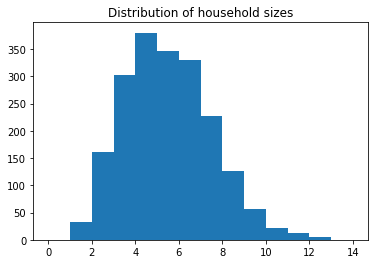

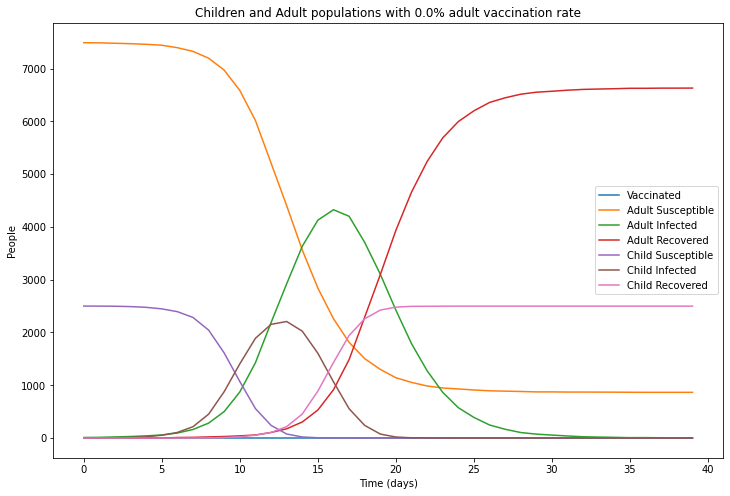

2499 children or 99.96000000000001% of children have been infected.


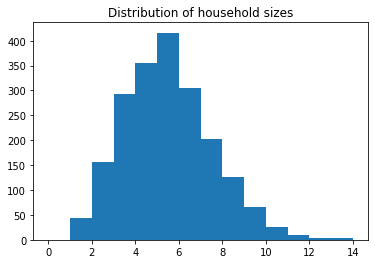

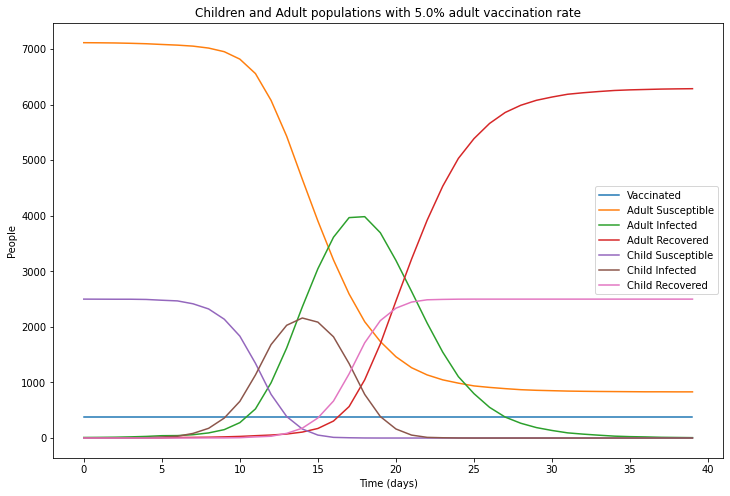

2500 children or 100.0% of children have been infected.


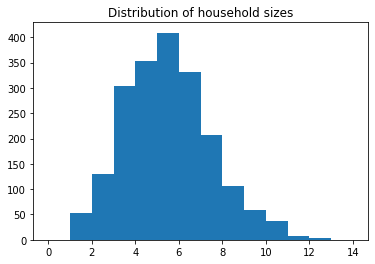

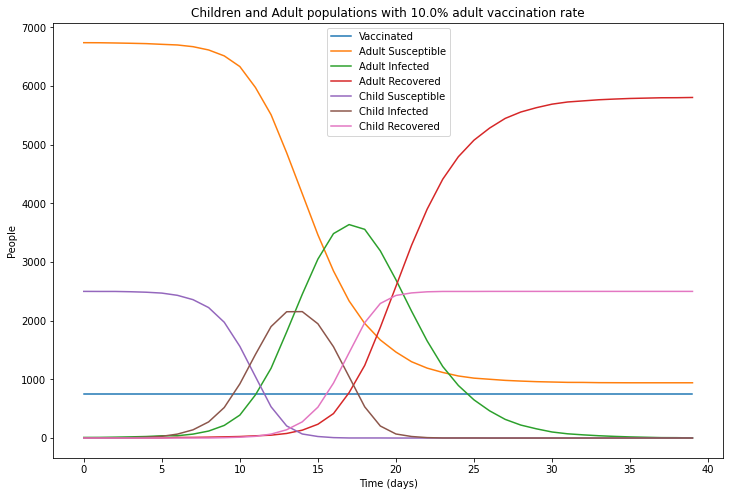

2500 children or 100.0% of children have been infected.


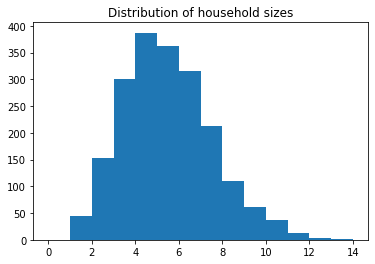

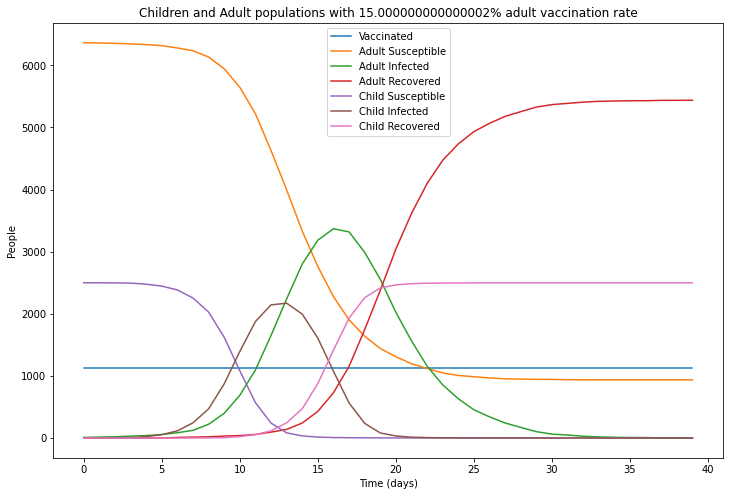

2499 children or 99.96000000000001% of children have been infected.


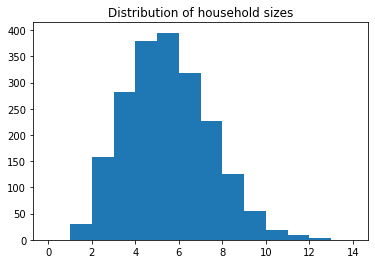

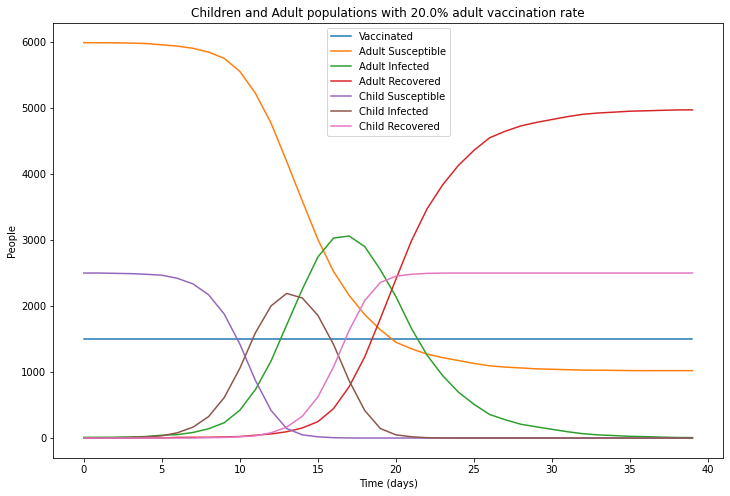

2500 children or 100.0% of children have been infected.


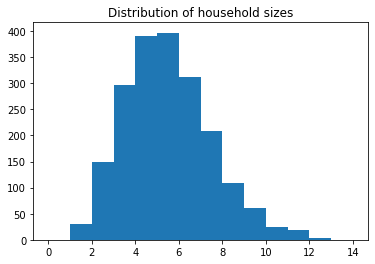

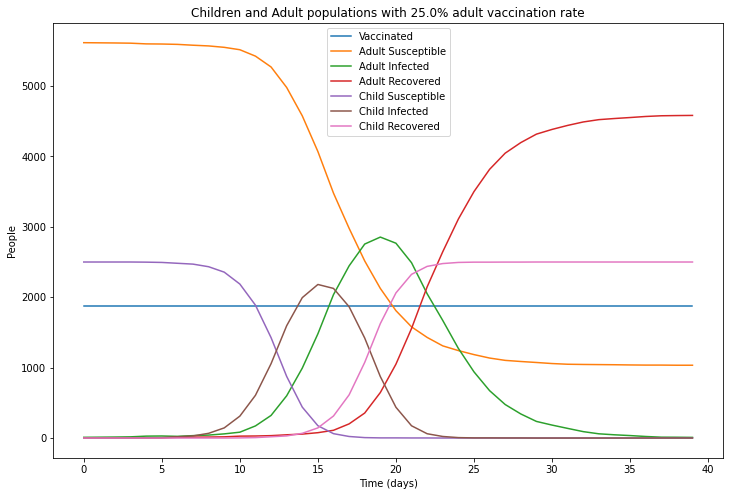

2500 children or 100.0% of children have been infected.


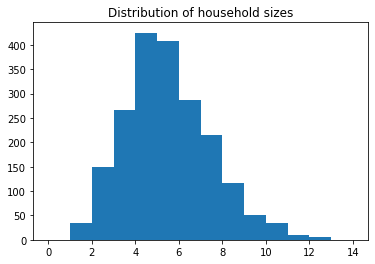

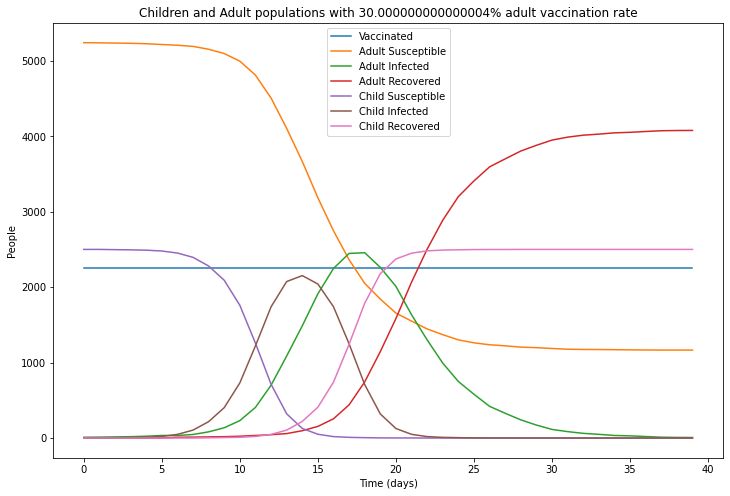

2500 children or 100.0% of children have been infected.


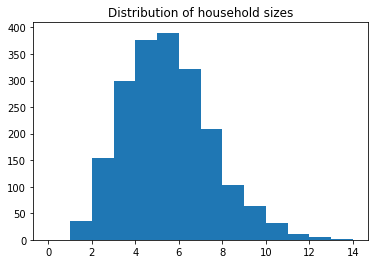

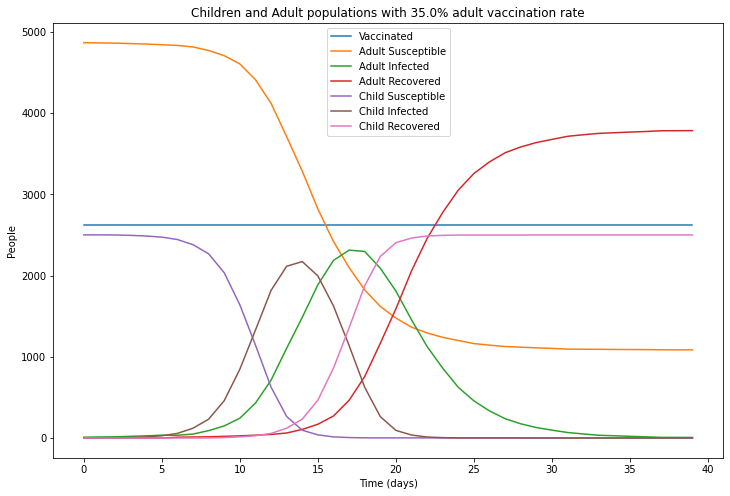

2499 children or 99.96000000000001% of children have been infected.


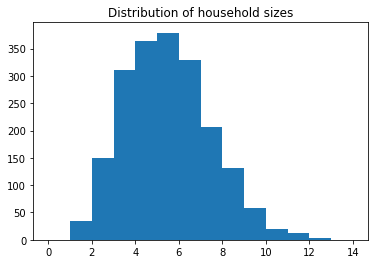

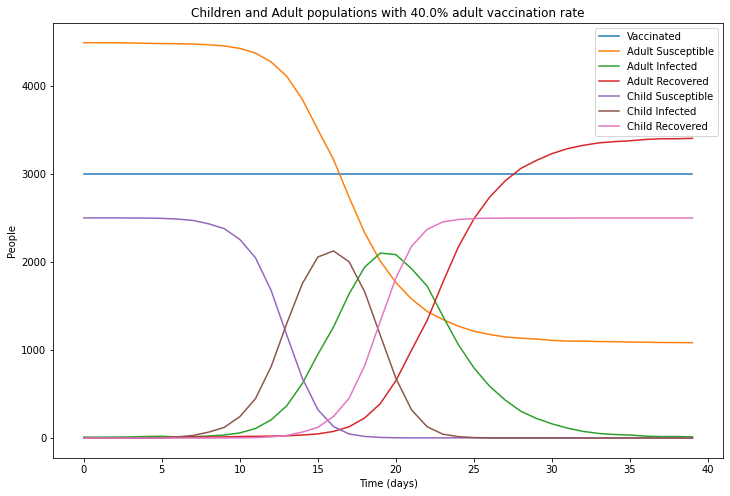

2499 children or 99.96000000000001% of children have been infected.


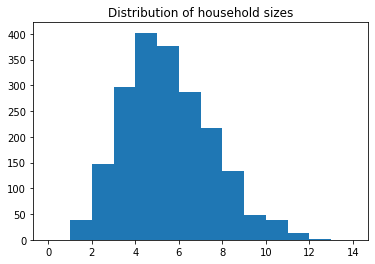

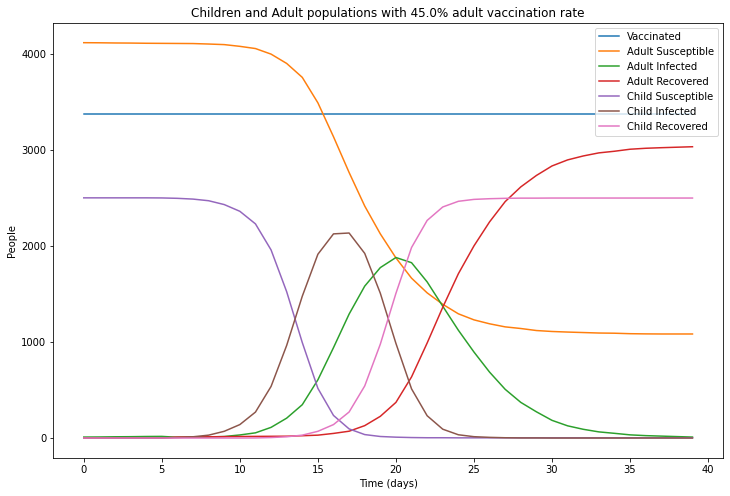

2498 children or 99.92% of children have been infected.


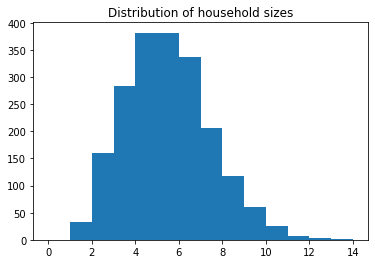

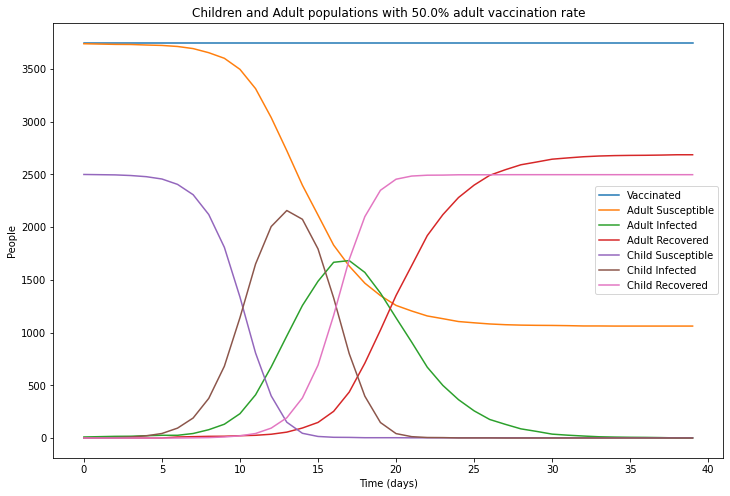

2498 children or 99.92% of children have been infected.


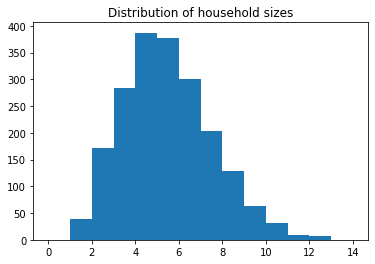

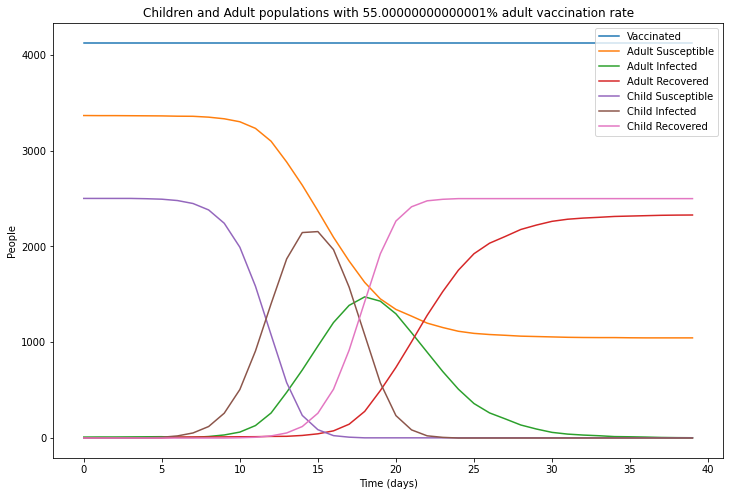

2498 children or 99.92% of children have been infected.


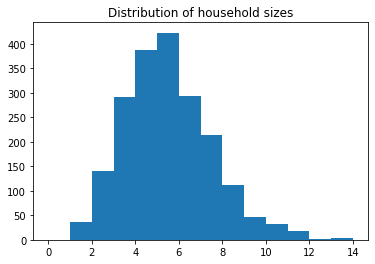

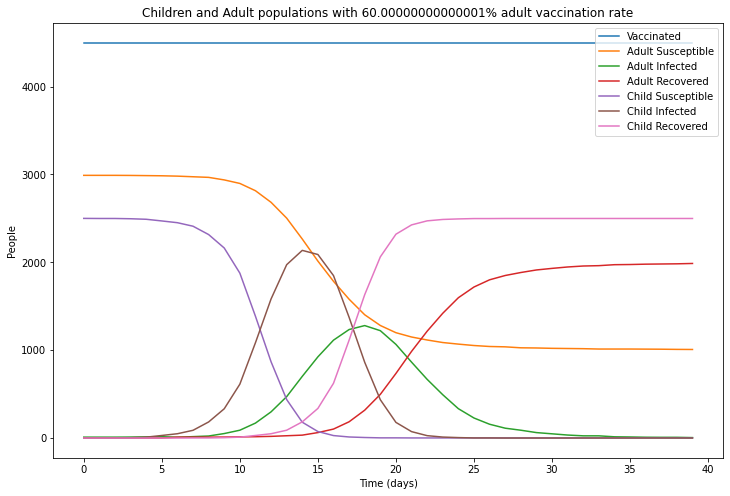

2499 children or 99.96000000000001% of children have been infected.


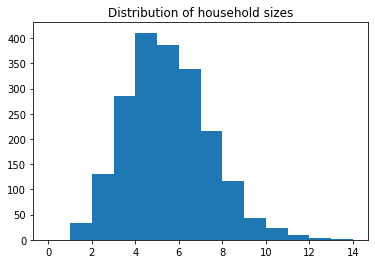

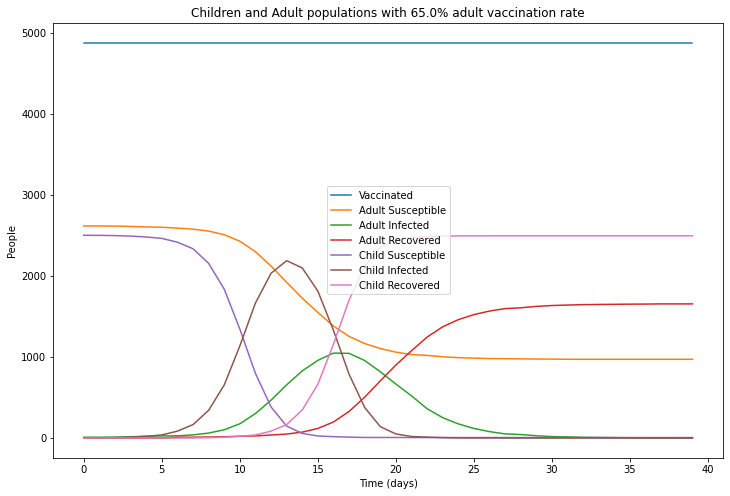

2494 children or 99.76% of children have been infected.


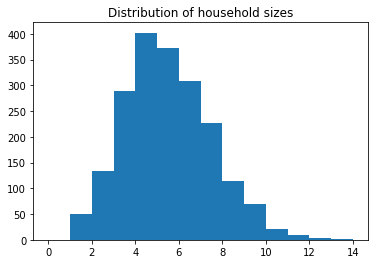

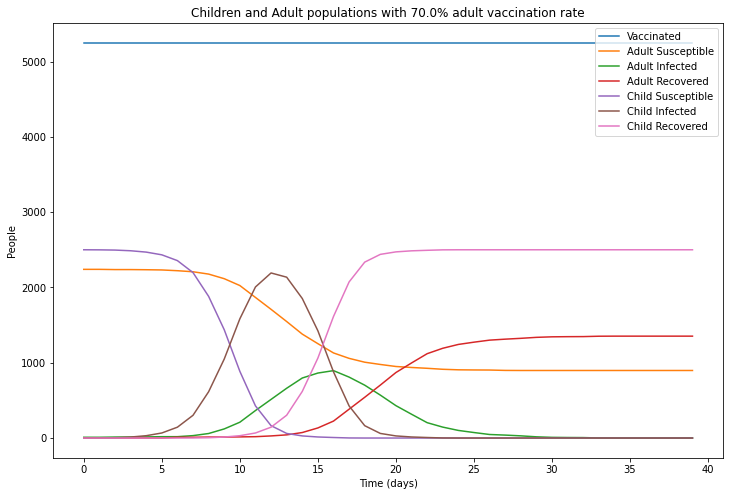

2500 children or 100.0% of children have been infected.


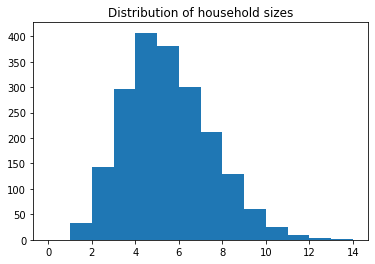

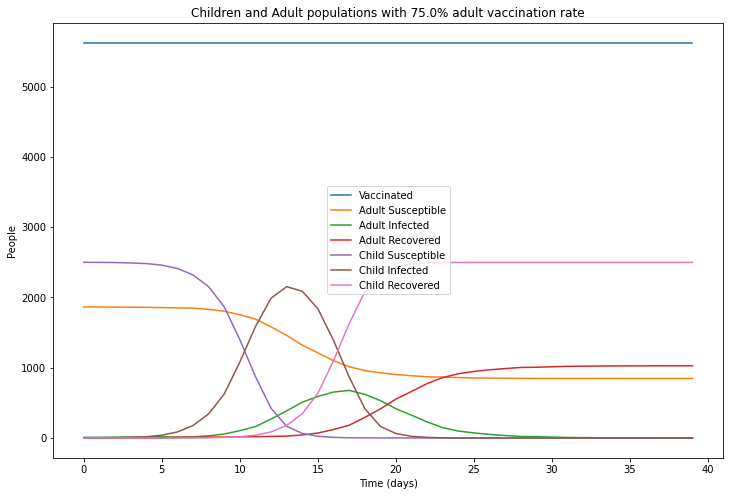

2499 children or 99.96000000000001% of children have been infected.


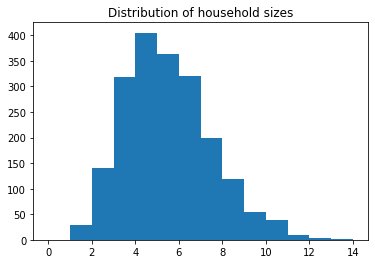

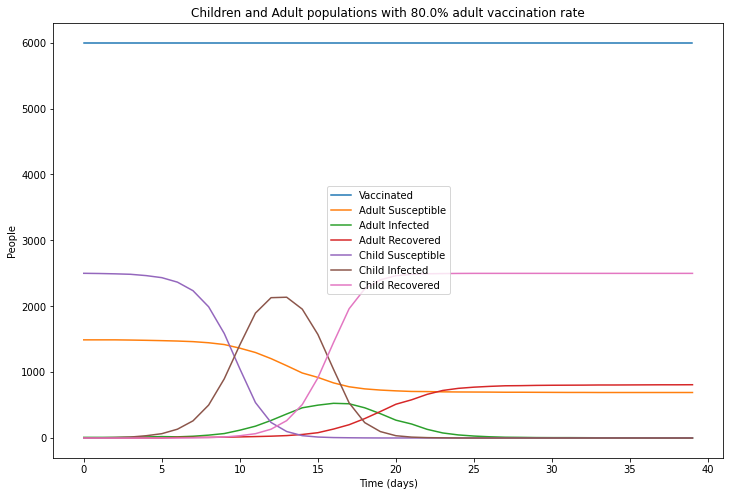

2499 children or 99.96000000000001% of children have been infected.


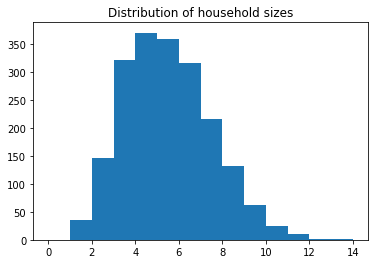

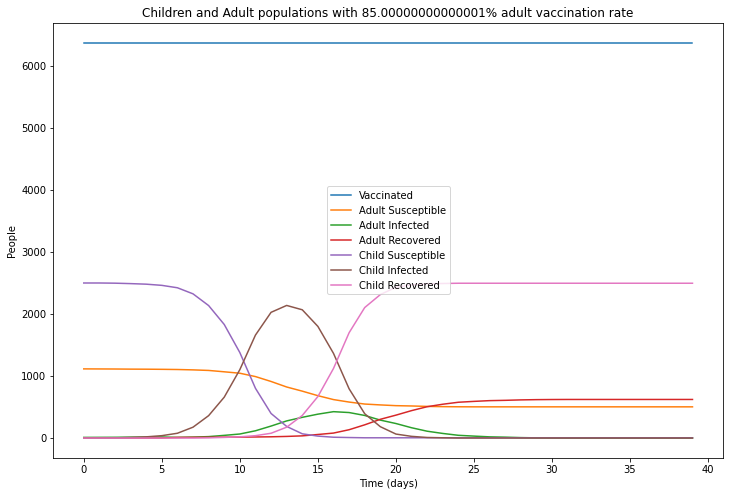

2496 children or 99.83999999999999% of children have been infected.


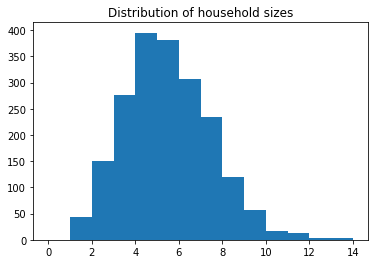

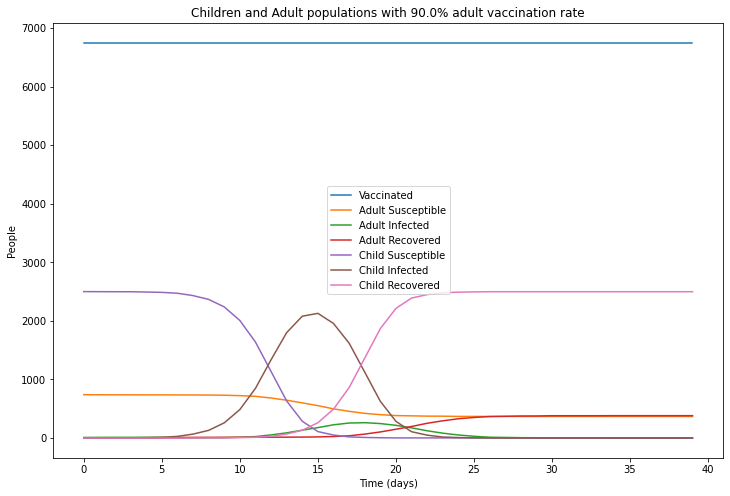

2498 children or 99.92% of children have been infected.


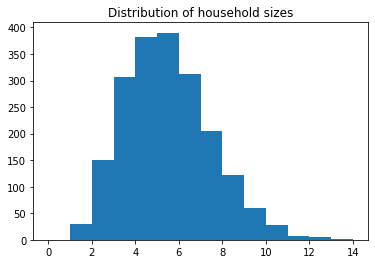

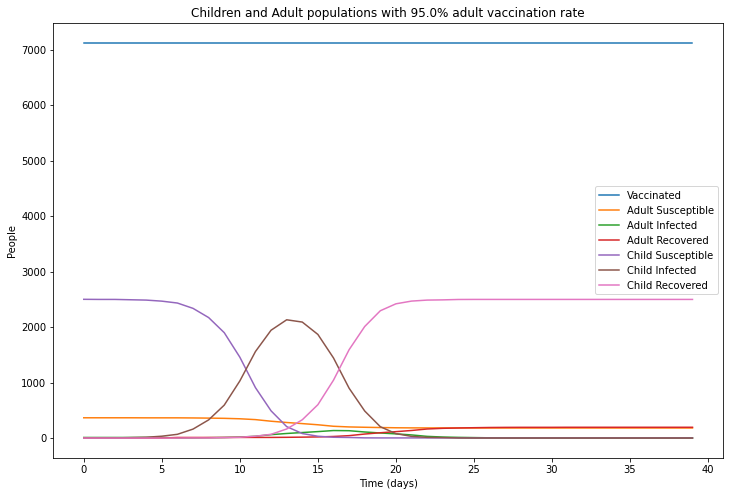

2498 children or 99.92% of children have been infected.


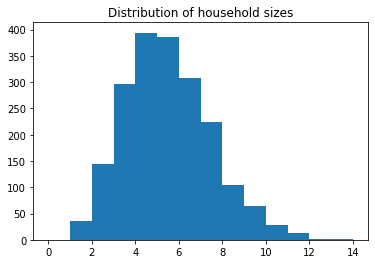

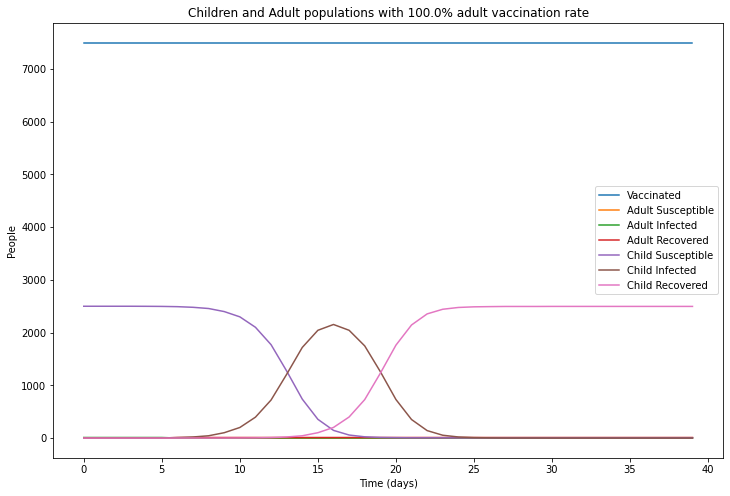

2497 children or 99.88% of children have been infected.


In [ ]:
for i in np.arange(0.0,1.05,0.05):
  main(10000, 10, 0, 2, 5, 5, i, 5, 40, 0.25)
  

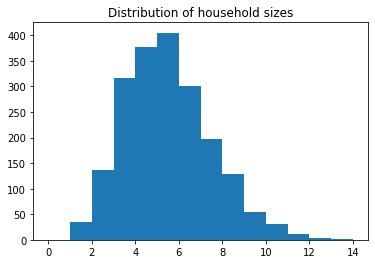

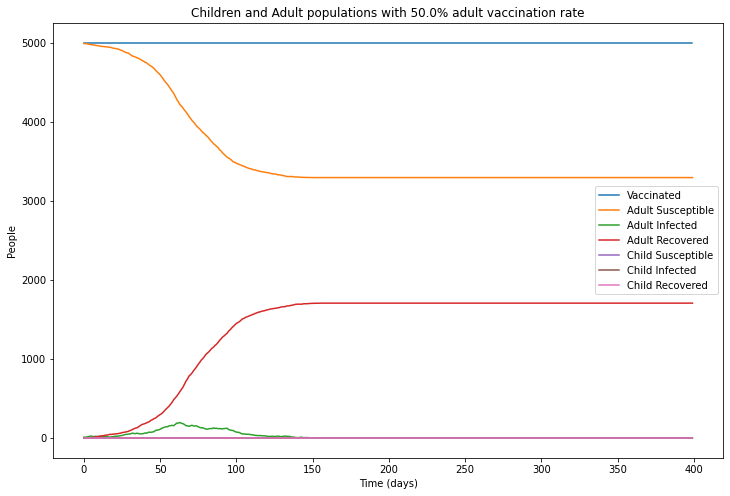

ZeroDivisionError: ignored

In [ ]:
  # model with no children or households
  main(10000, 10, 0, 2, 5, 5, .5, 5, 400, 0)

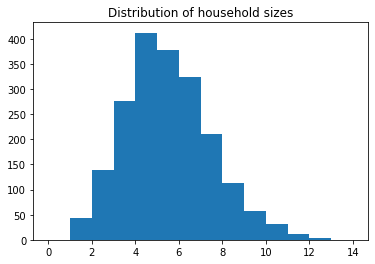

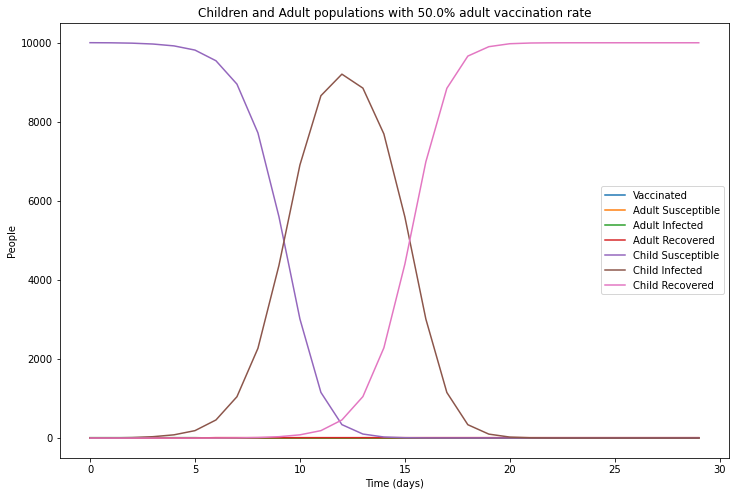

9998 children or 99.98% of children have been infected.


In [ ]:
#model with no adults or households
main(10000, 10, 0, 2, 5, 5, .5, 5, 30,1)

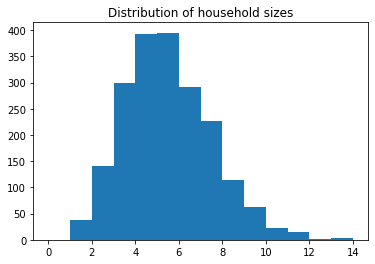

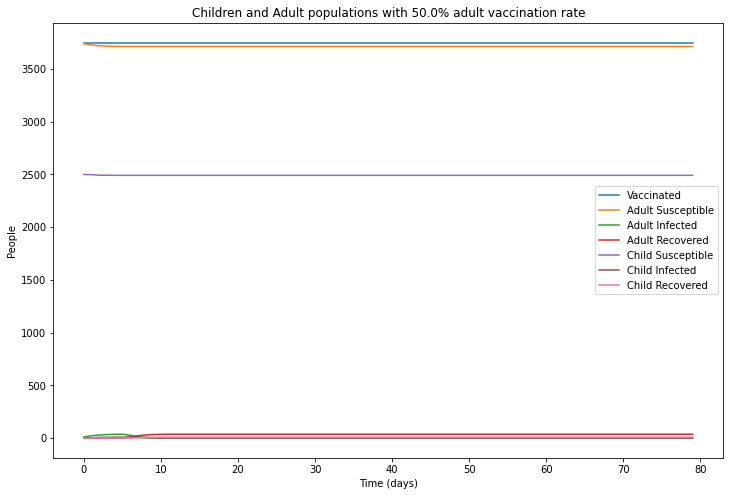

8 children or 0.32% of children have been infected.


In [ ]:
#no school or community transmission
main(10000, 10, .5, 0, 0, 5, .5, 5, 80, .25)

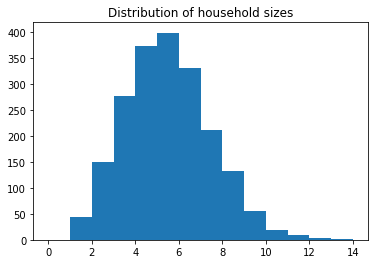

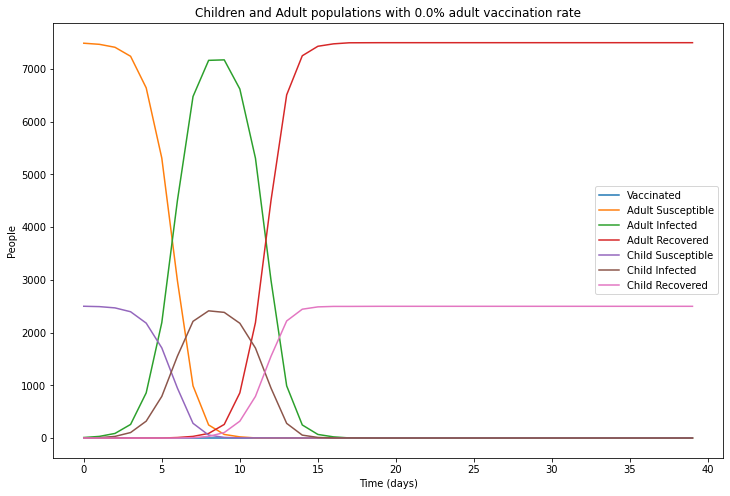

2499 children or 99.96000000000001% of children have been infected.


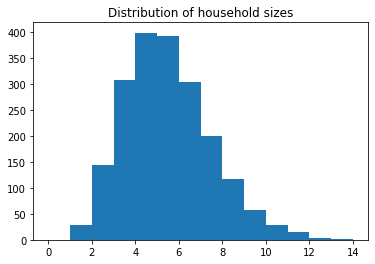

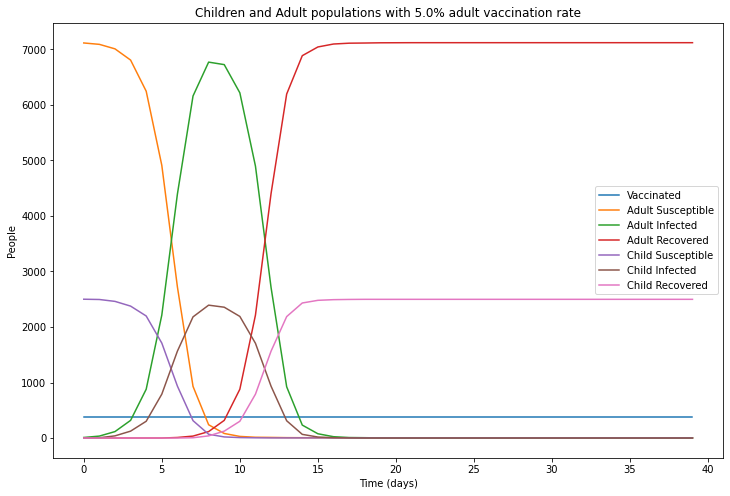

2498 children or 99.92% of children have been infected.


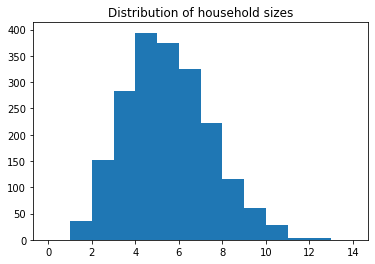

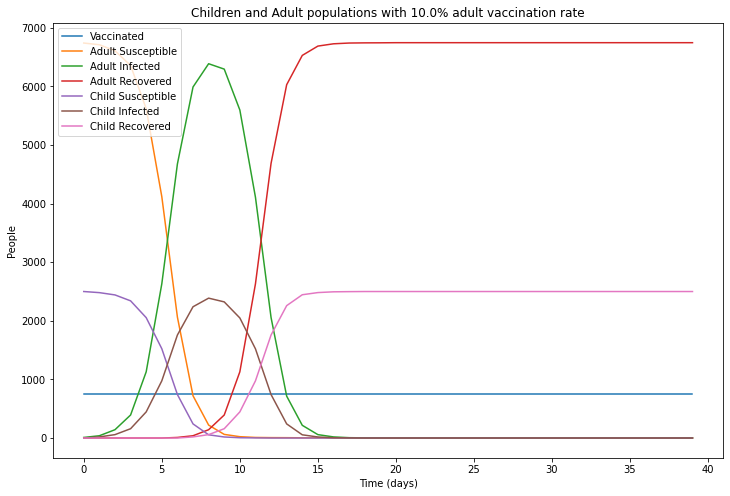

2500 children or 100.0% of children have been infected.


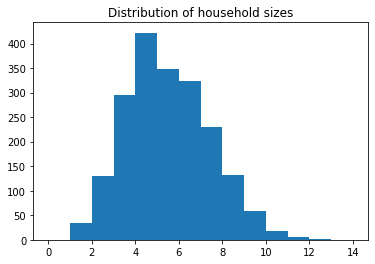

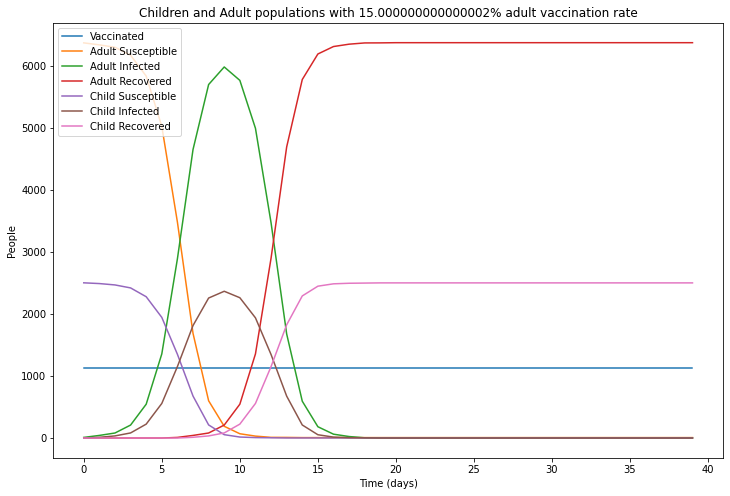

2499 children or 99.96000000000001% of children have been infected.


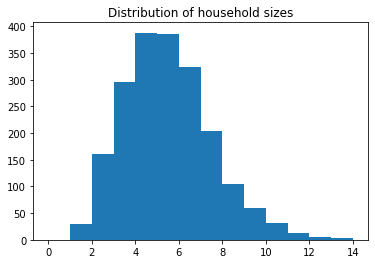

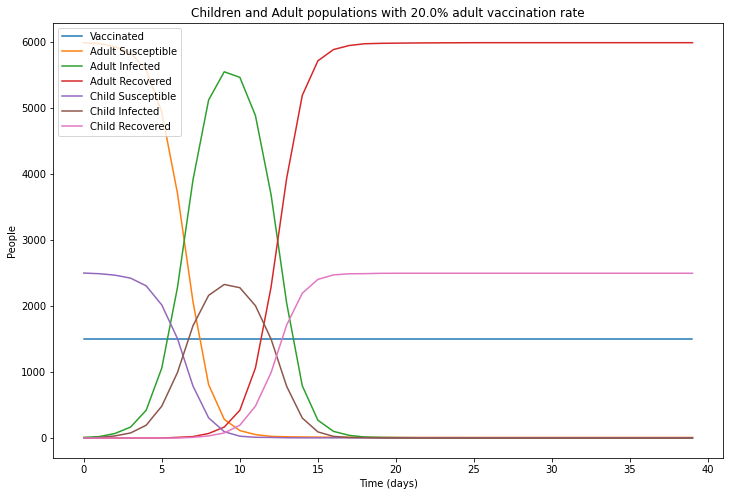

2497 children or 99.88% of children have been infected.


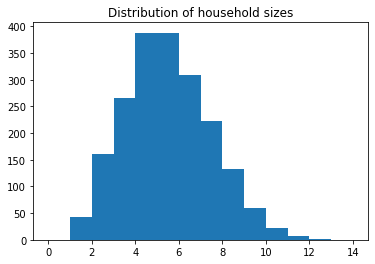

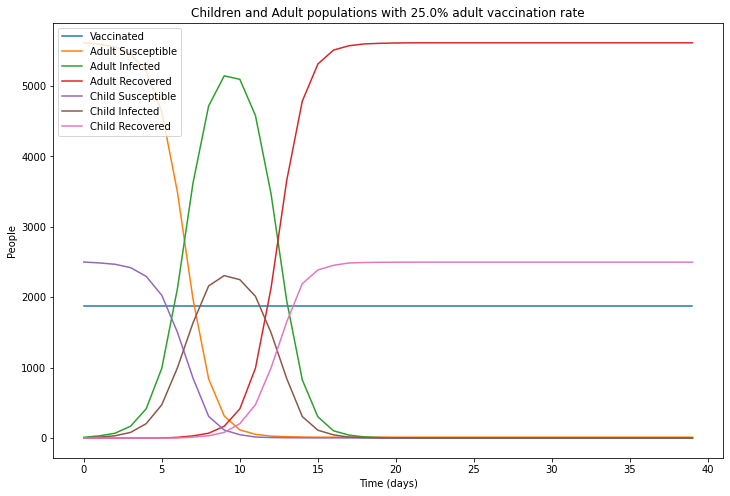

2498 children or 99.92% of children have been infected.


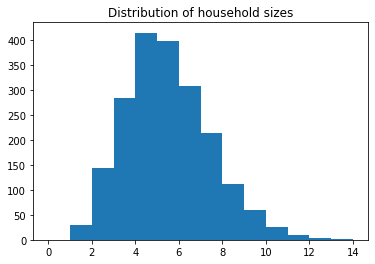

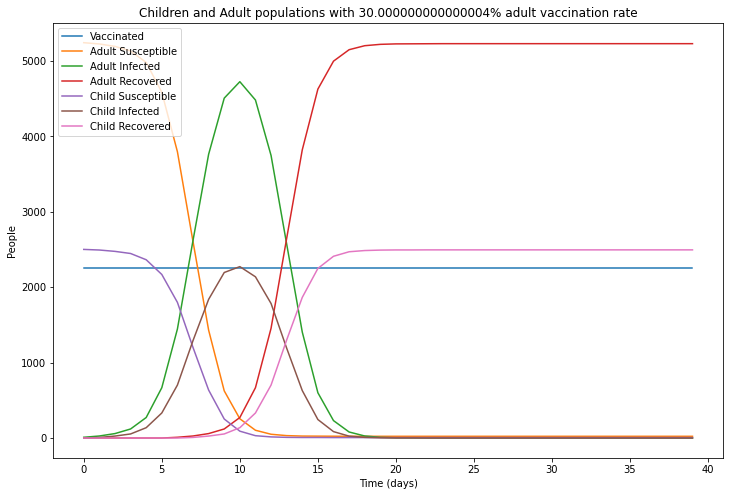

2494 children or 99.76% of children have been infected.


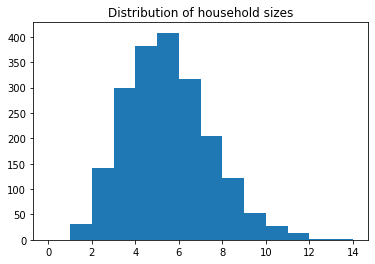

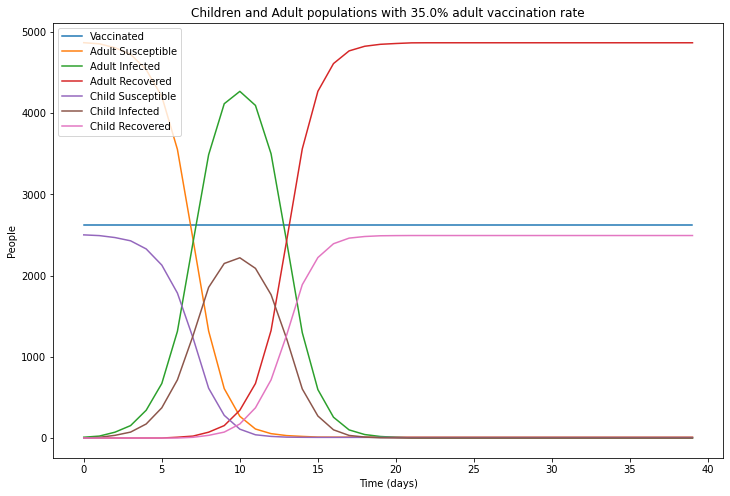

2492 children or 99.68% of children have been infected.


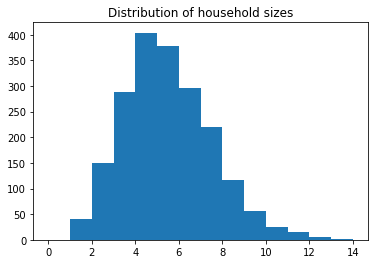

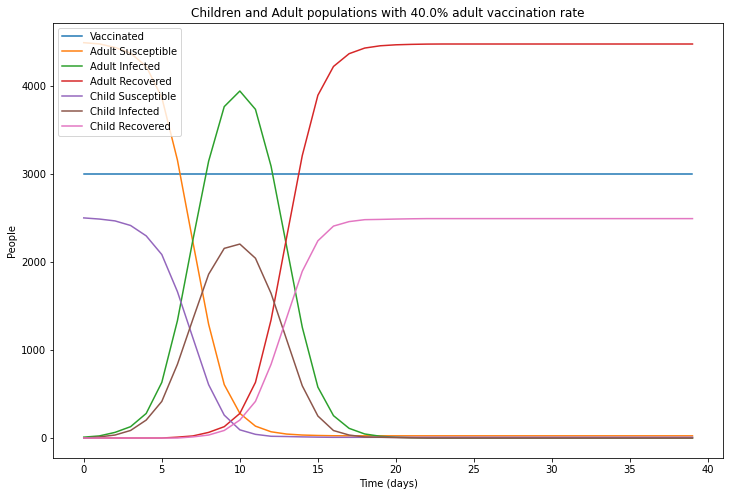

2492 children or 99.68% of children have been infected.


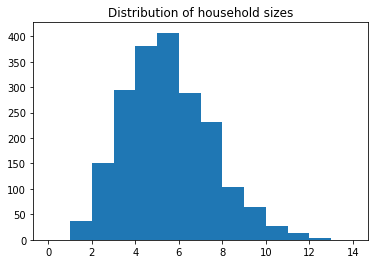

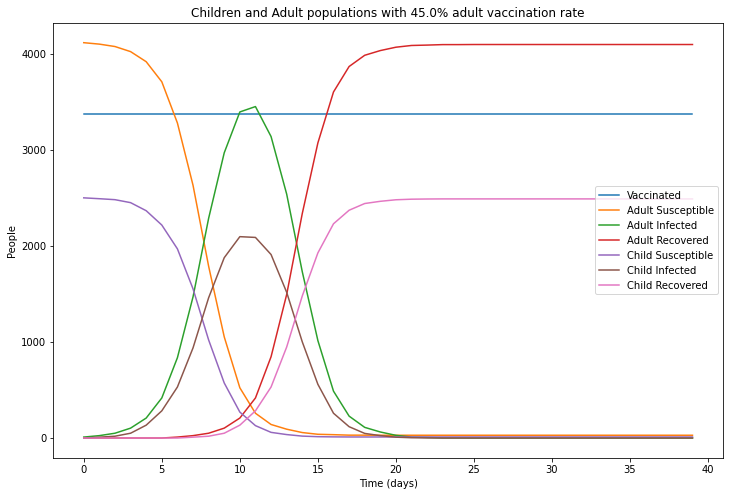

2489 children or 99.56% of children have been infected.


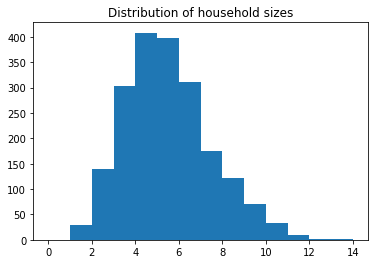

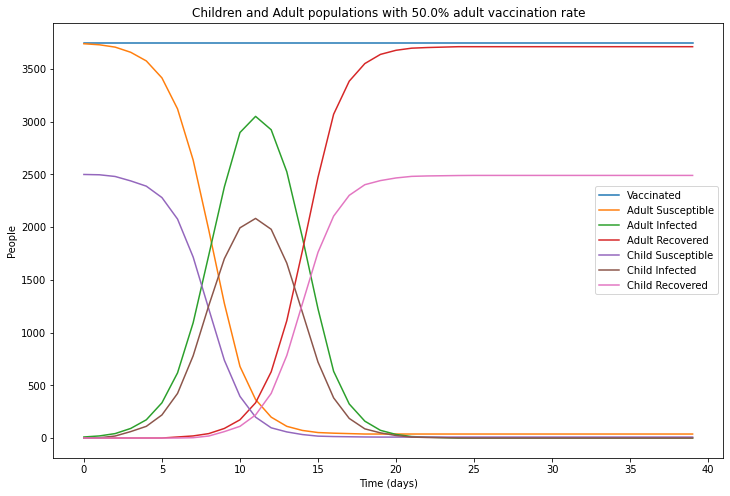

2491 children or 99.64% of children have been infected.


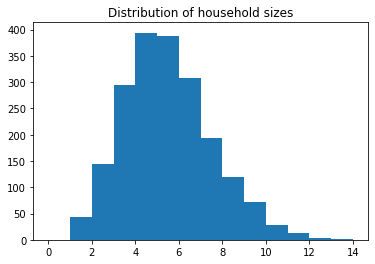

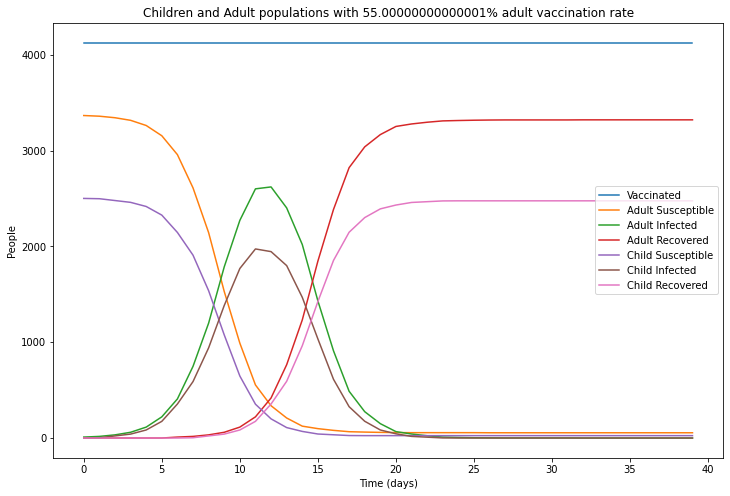

2475 children or 99.0% of children have been infected.


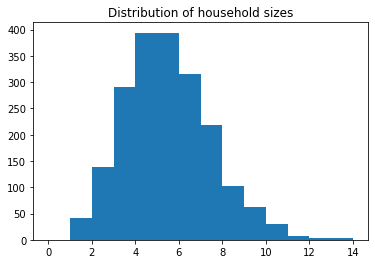

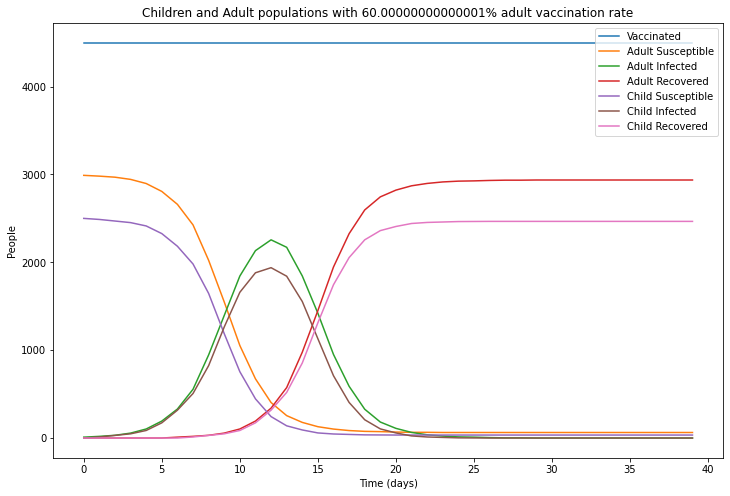

2466 children or 98.64% of children have been infected.


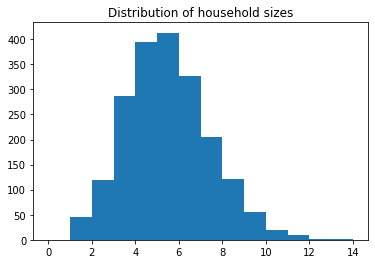

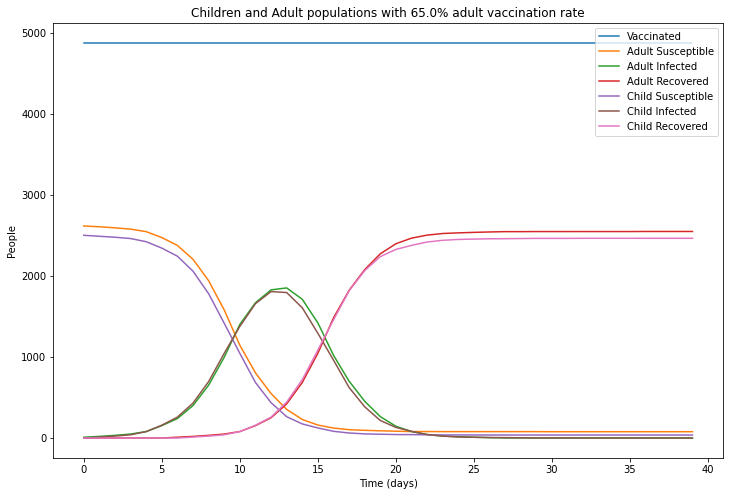

2463 children or 98.52% of children have been infected.


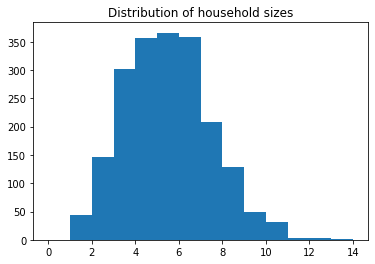

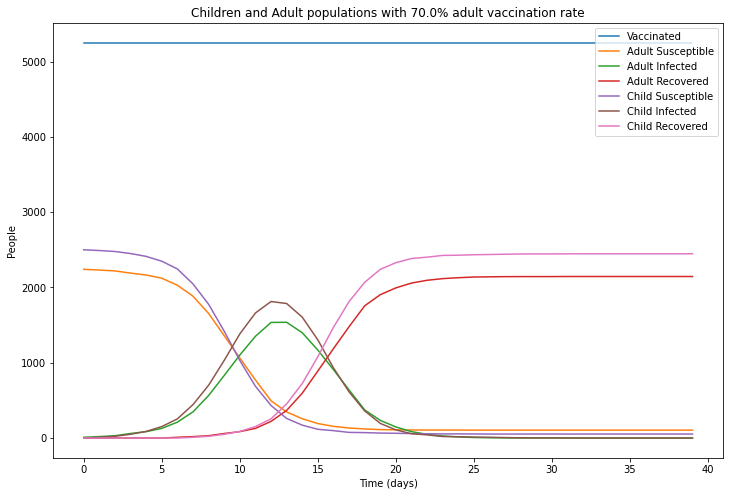

2447 children or 97.88% of children have been infected.


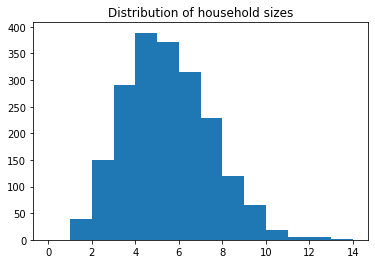

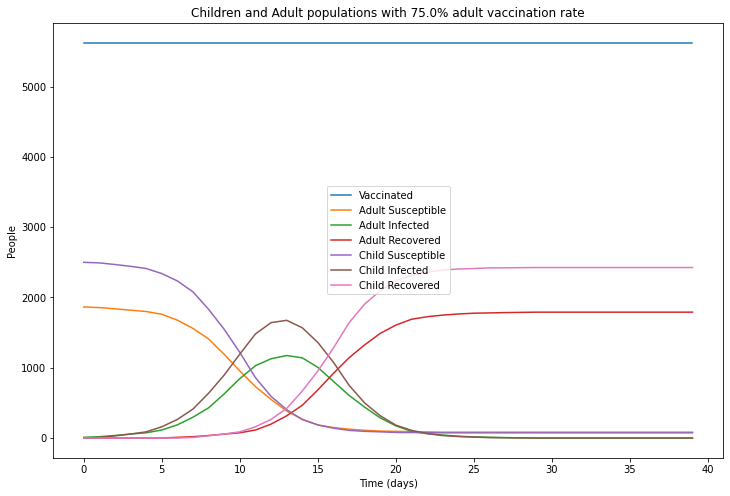

2426 children or 97.04% of children have been infected.


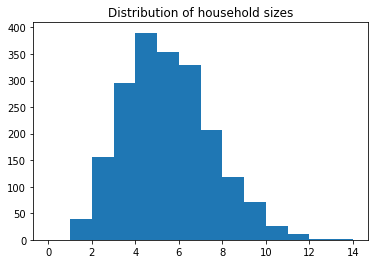

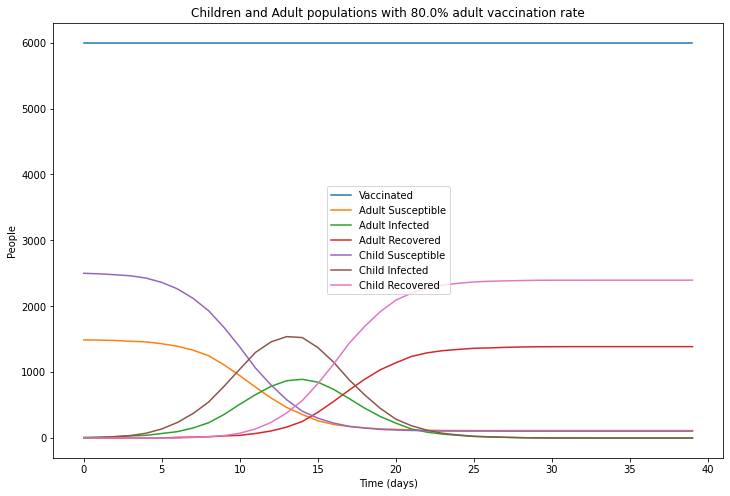

2396 children or 95.84% of children have been infected.


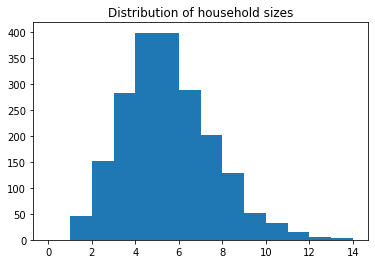

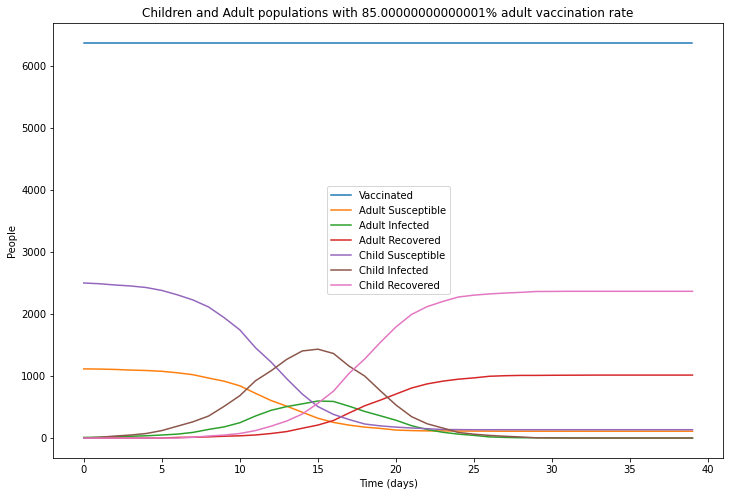

2366 children or 94.64% of children have been infected.


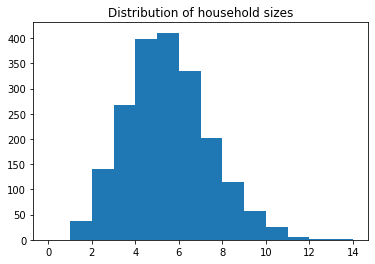

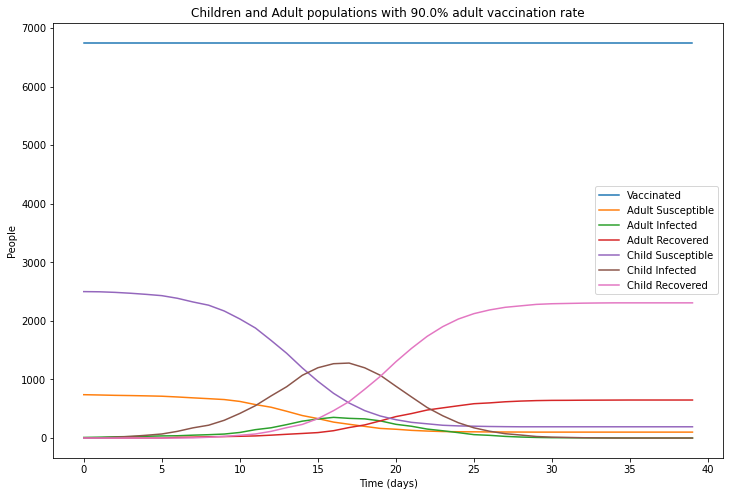

2308 children or 92.32000000000001% of children have been infected.


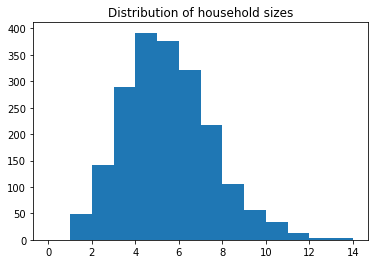

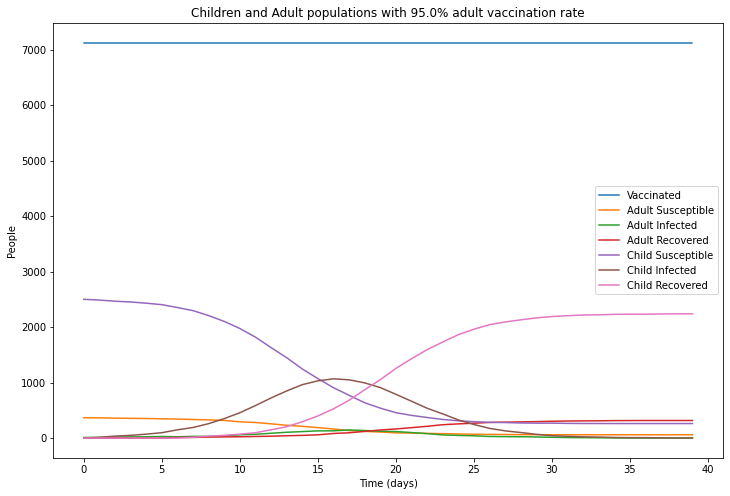

2238 children or 89.52% of children have been infected.


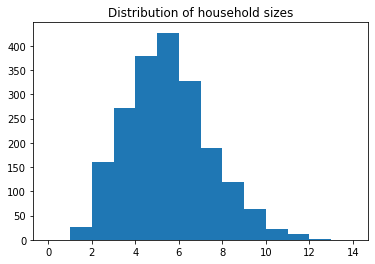

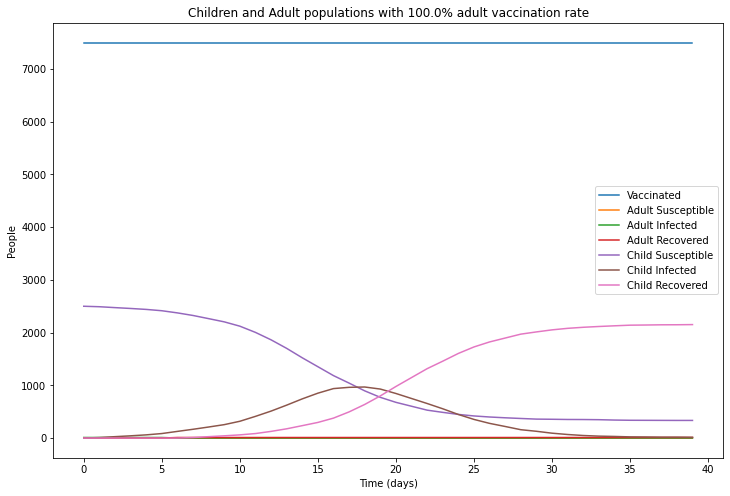

2152 children or 86.08% of children have been infected.


In [ ]:
#what percent vaccination of adults is needed to reduce child pandemic

for i in np.arange(0.0,1.05,0.05):
  main(10000, 10, .5, 2.5, .5, 5, i, 5, 40, 0.25)

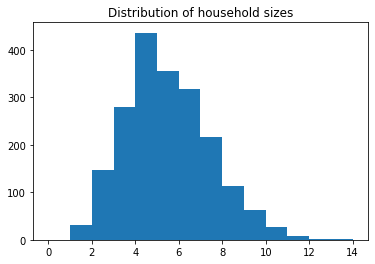

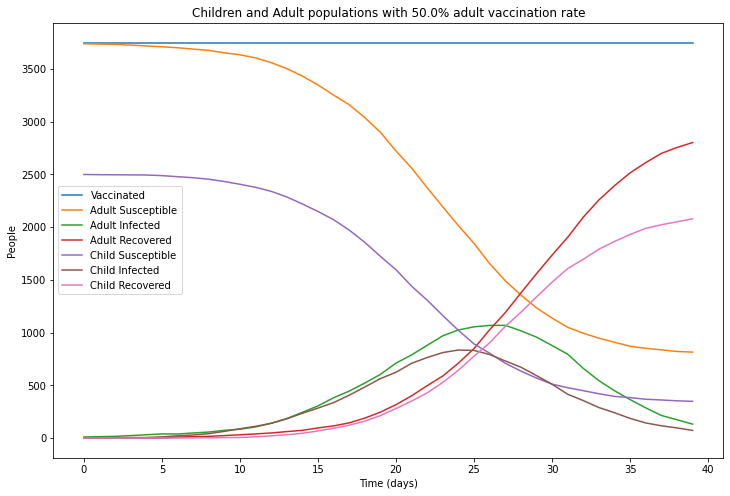

2080 children or 83.2% of children have been infected.


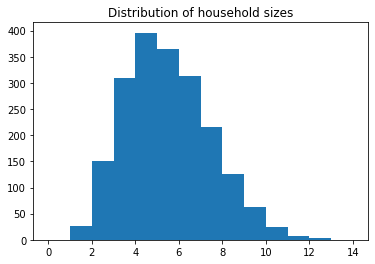

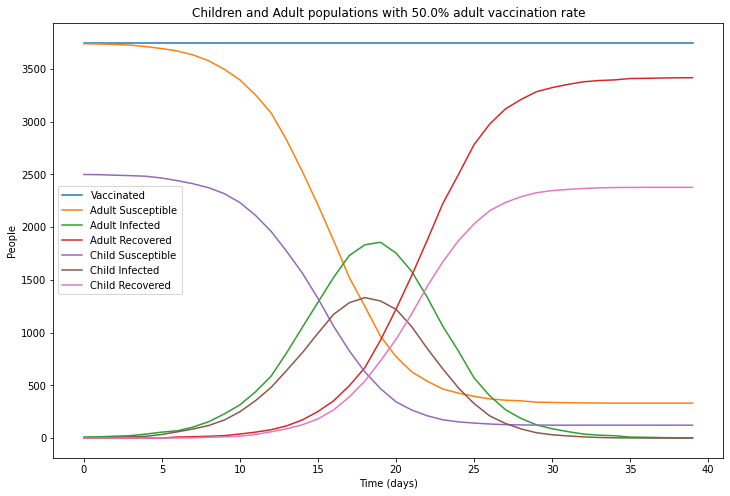

2378 children or 95.12% of children have been infected.


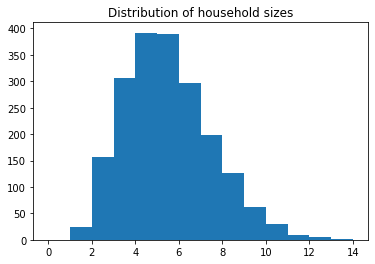

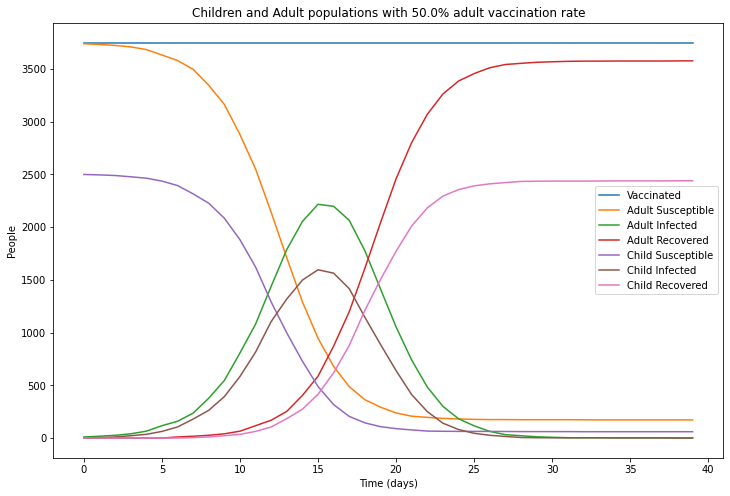

2440 children or 97.6% of children have been infected.


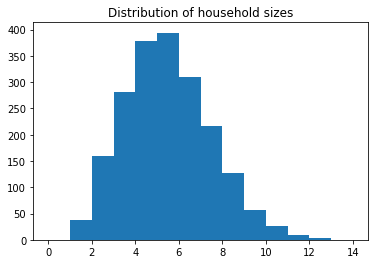

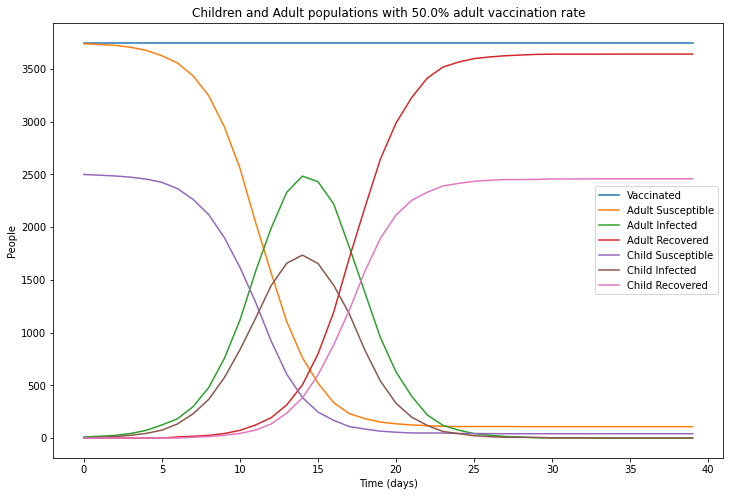

2459 children or 98.36% of children have been infected.


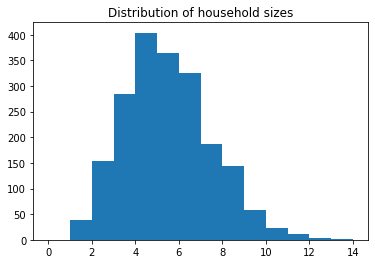

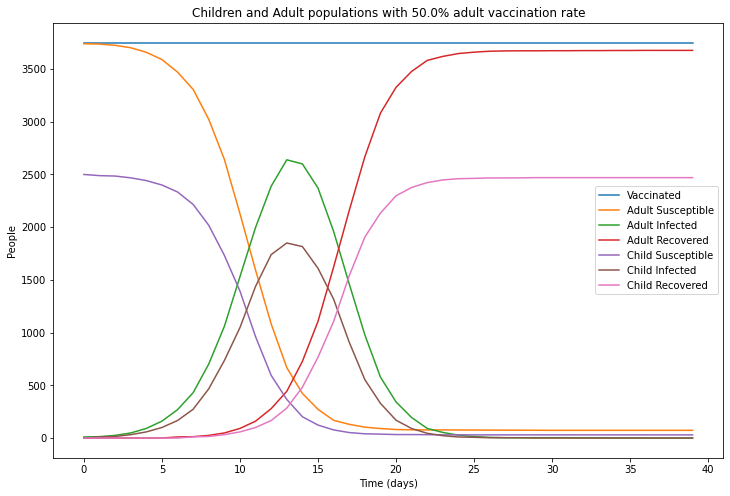

2470 children or 98.8% of children have been infected.


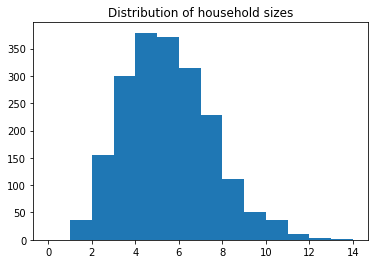

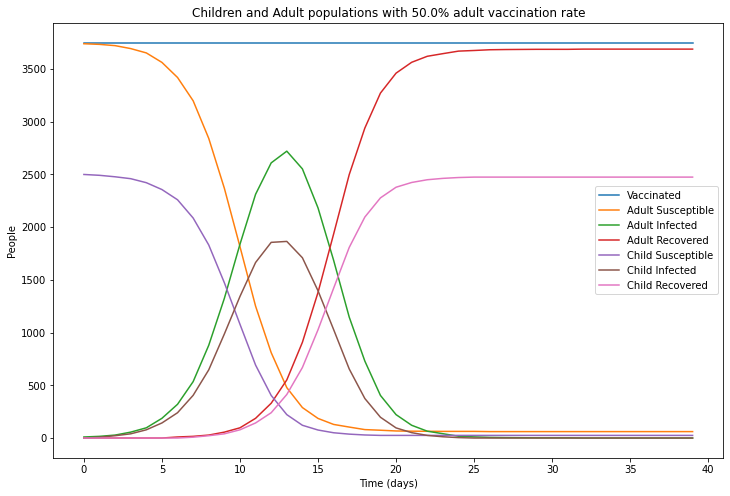

2475 children or 99.0% of children have been infected.


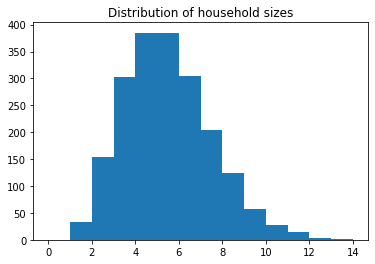

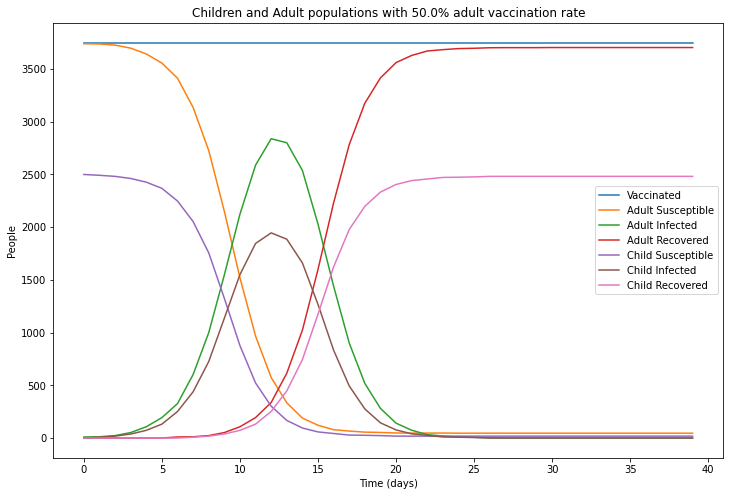

2482 children or 99.28% of children have been infected.


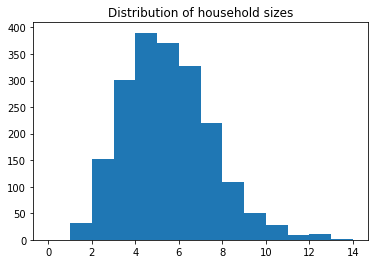

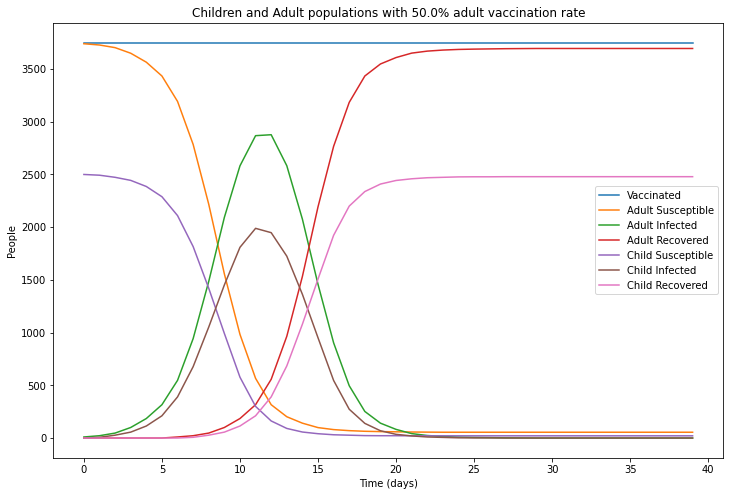

2479 children or 99.16% of children have been infected.


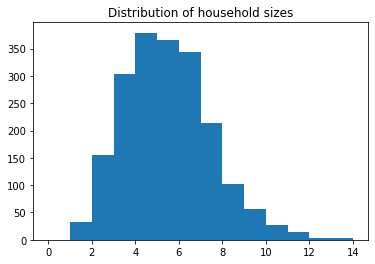

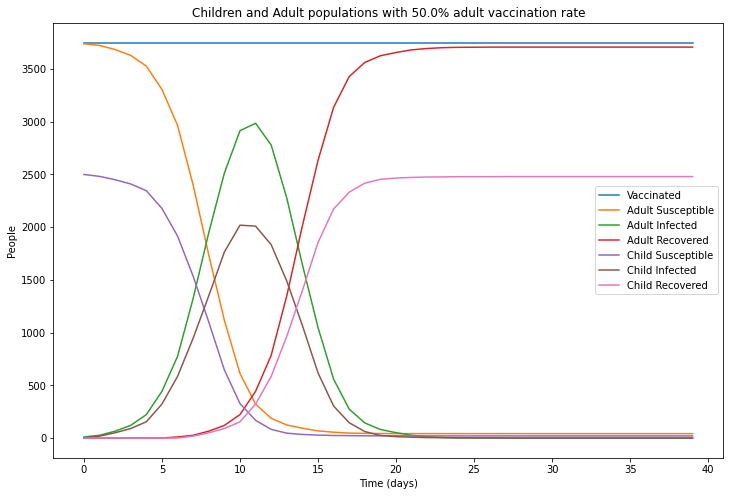

2480 children or 99.2% of children have been infected.


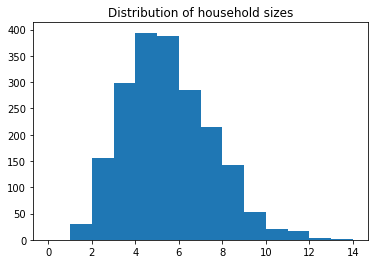

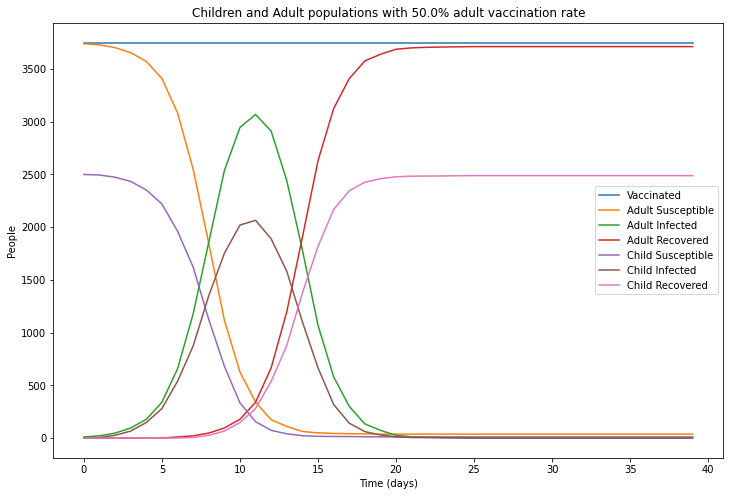

2489 children or 99.56% of children have been infected.


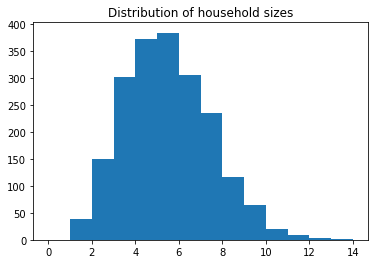

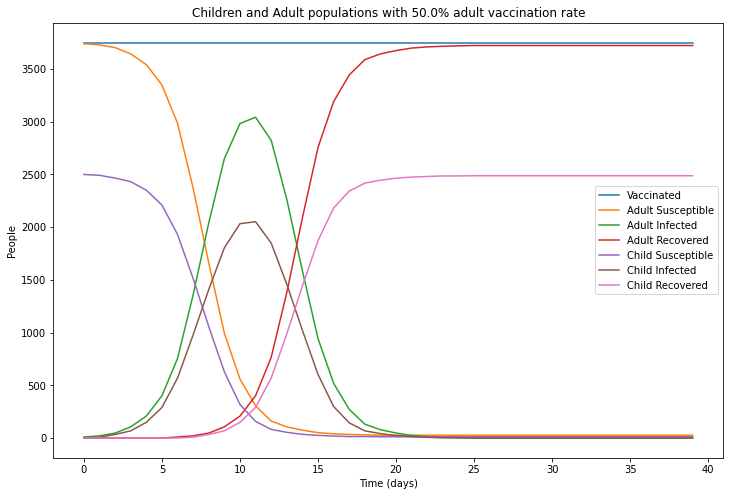

2488 children or 99.52% of children have been infected.


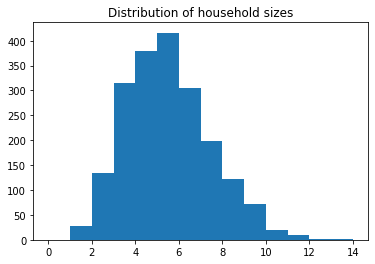

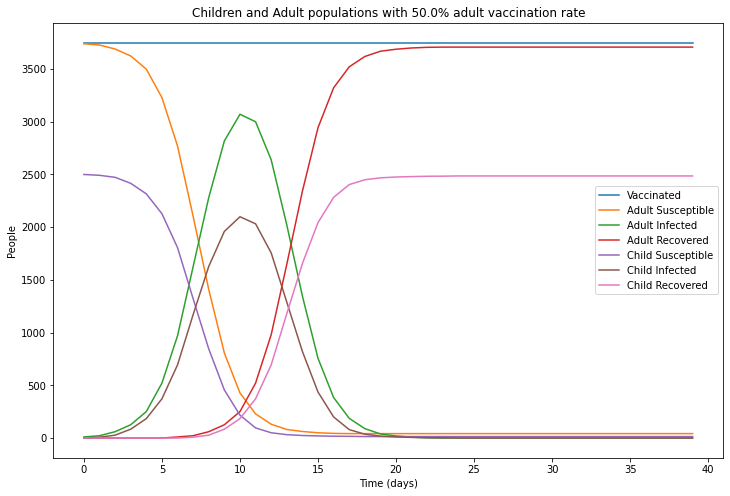

2486 children or 99.44% of children have been infected.


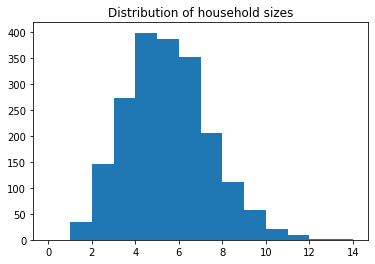

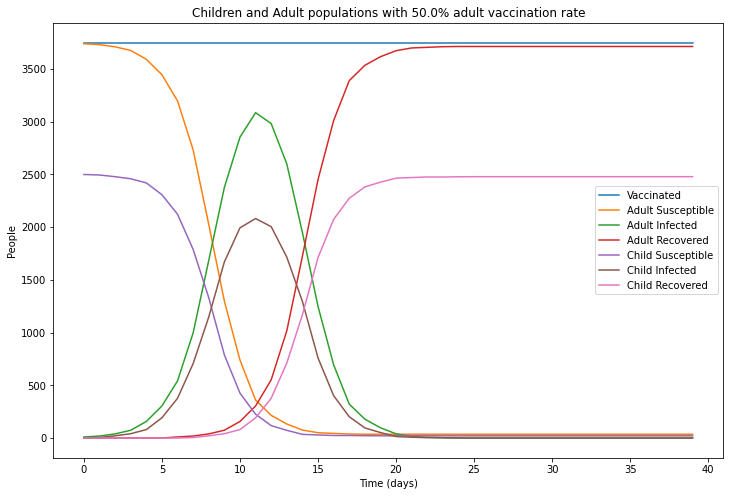

2479 children or 99.16% of children have been infected.


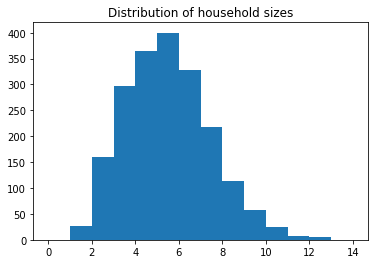

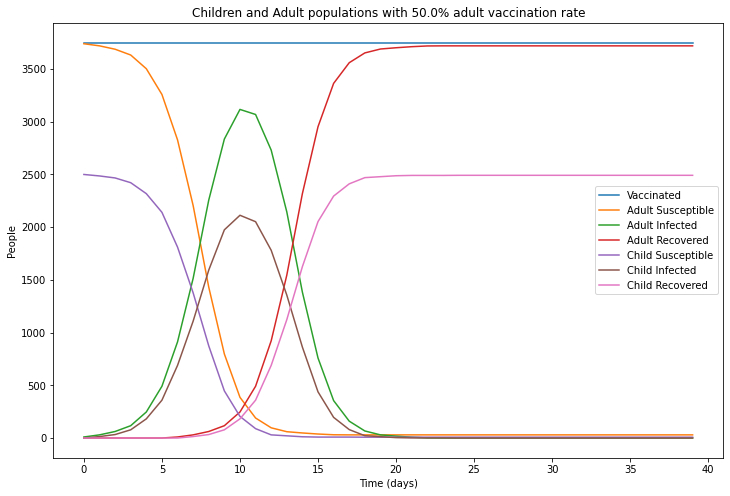

2492 children or 99.68% of children have been infected.


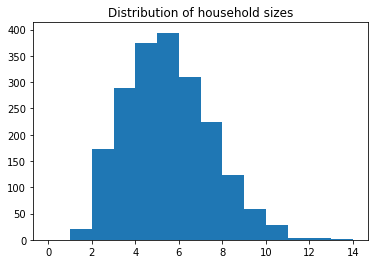

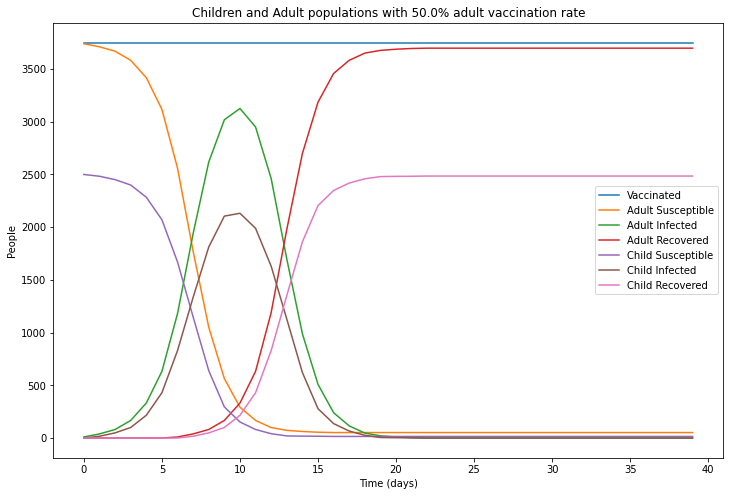

2485 children or 99.4% of children have been infected.


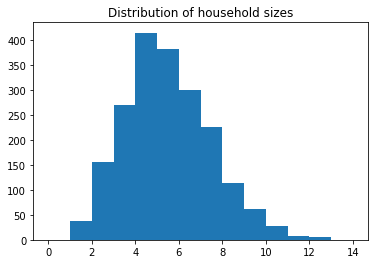

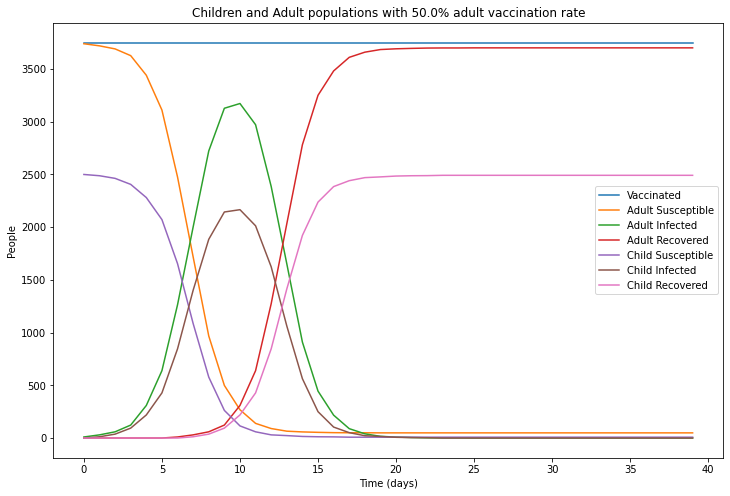

2492 children or 99.68% of children have been infected.


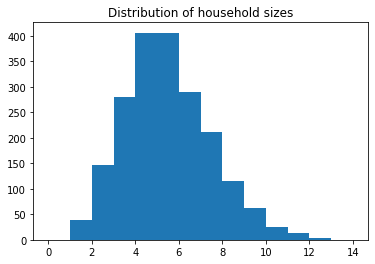

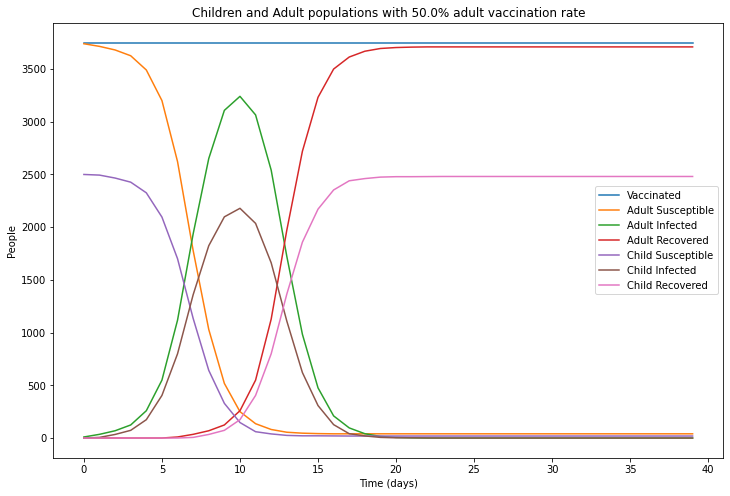

2481 children or 99.24% of children have been infected.


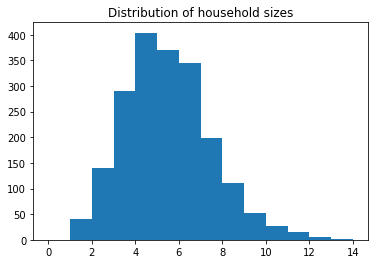

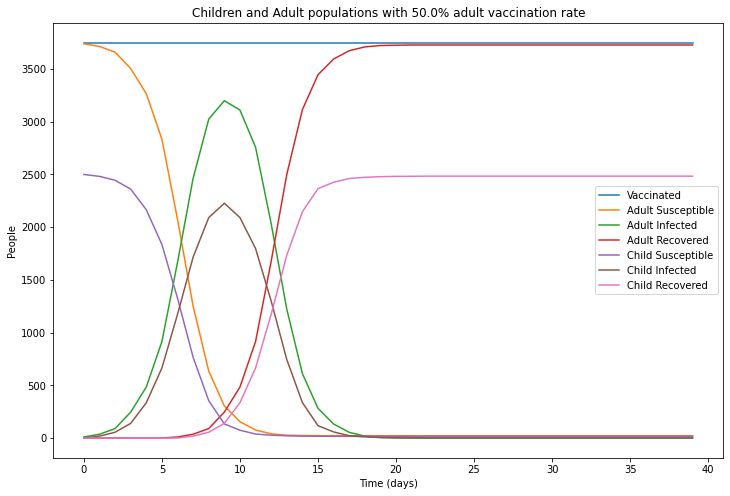

2484 children or 99.36% of children have been infected.


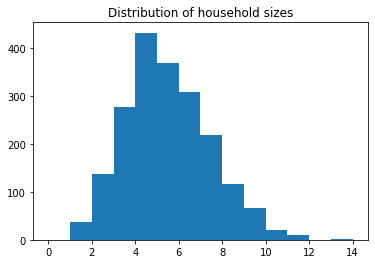

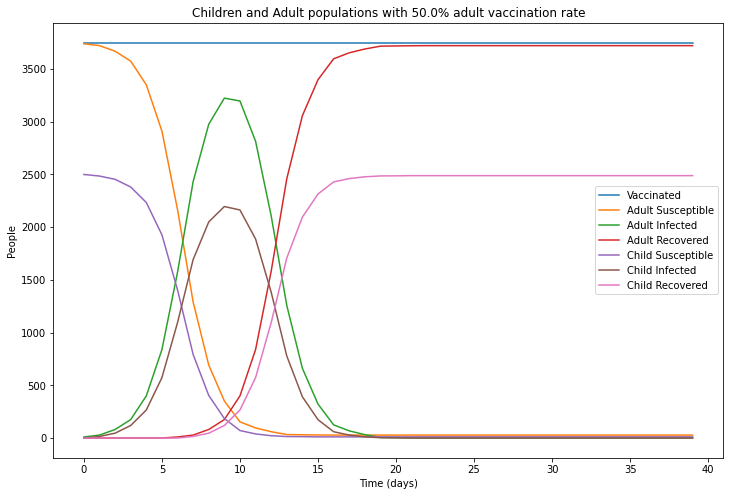

2489 children or 99.56% of children have been infected.


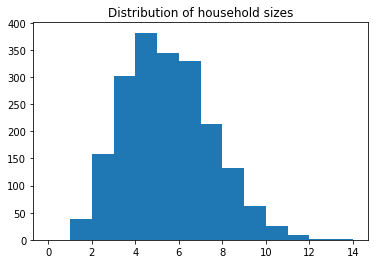

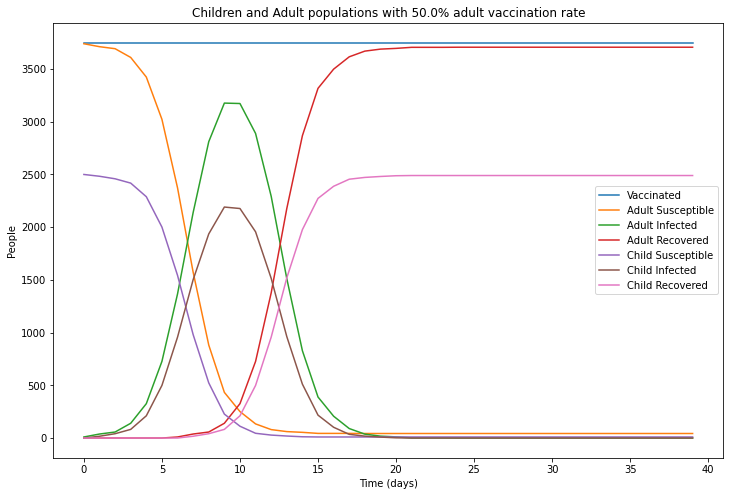

2490 children or 99.6% of children have been infected.


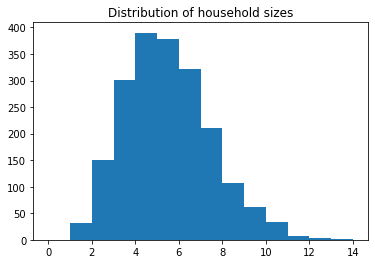

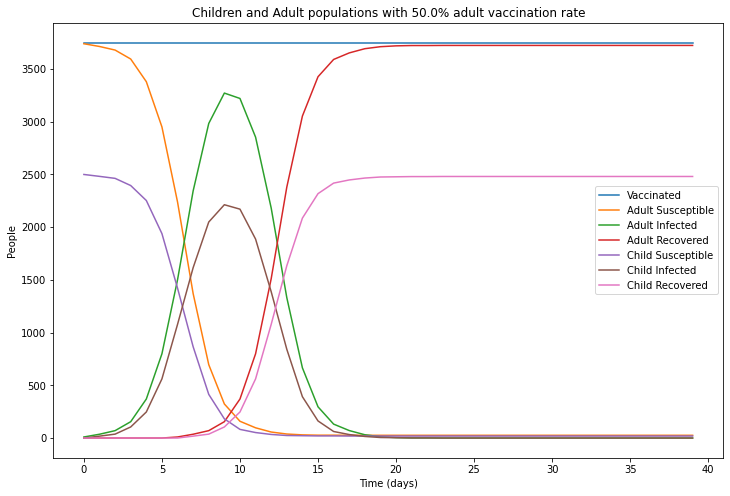

2481 children or 99.24% of children have been infected.


In [ ]:
#what impact do households have?

for i in np.arange(0.0,1.05,0.05):
  main(10000, 10, i, 2.5, .5, 5, .5, 5, 40, 0.25)

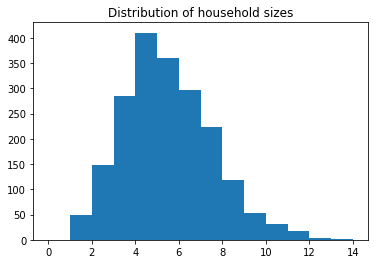

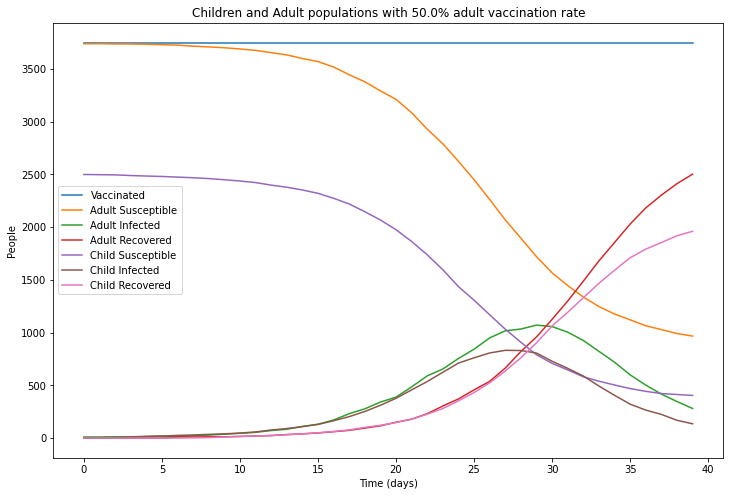

1961 children or 78.44% of children have been infected.


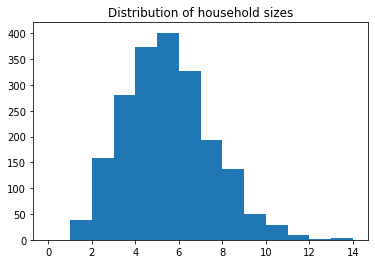

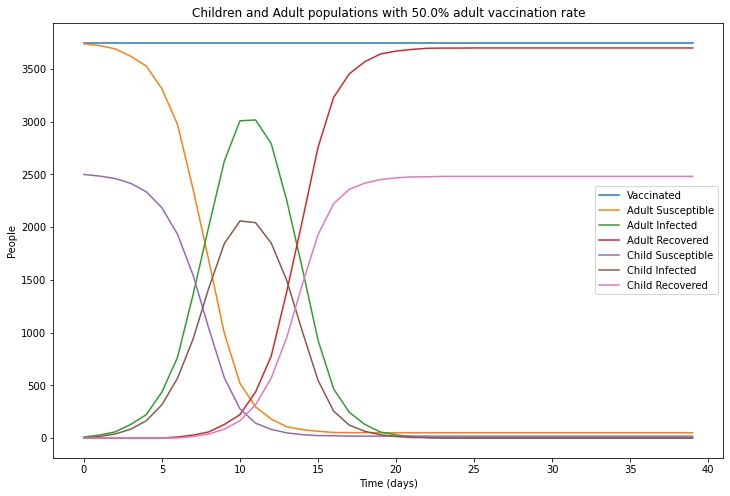

2482 children or 99.28% of children have been infected.


In [ ]:
  main(10000, 10, 0, 2.5, .5, 5, .5, 5, 40, 0.25)
  main(10000, 10, .5, 2.5, .5, 5, .5, 5, 40, 0.25)

What does this model tell us about the effect of vaccinating some adults on the epidemic?Is there an adult vaccination rate that will suppress school transmission?  Any conclusionsfor COVID?

Adult vaccinations seem to have a marginal impact on transmission in children, even with low $R_0$ values.

For what parameter ranges is an epidemic among children inevitable?

Almost all parameter combinations leads to an epidemic among children, unless the R value is below 1. Even in that case, a outbreak still occurs, but may not be widespread enough to be considered an epidemic. 

What is the function of households in this model?  Could you have found similar results without them?  How much do they change your results in various parameter ranges?

Households represent another form of social transision that has a higher risk of infection. You could have gotten similar results by increasing the R value for social interactions or increasing the number of interactions themselves. By increasing the probability of tranmissions within households, the epidemic occurs earlier and quicker. Additionally, a higher number of children end up infected. 

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

"""
This model uses one R0 value and multiple contact rates
"""


def contact_model(N, I, R0, c_h, c_c, c_s, household_size, fraction_of_adults_vaccinated, D, run_time):

  class person:
    def __init__(self, infection_state):
      self.infection_state = infection_state
      self.infection_time = 1
    
    def __str__(self):
      return self.infection_state

    def __repr__(self):
      return self.infection_state

    def advance_infection(self):
      if (self.infection_state == "I"):
        if (self.infection_time > D):
          self.infection_state = "R"
        else:
          self.infection_time += 1


    def interact(self, c, I, Number):
      if self.infection_state == "S":
        probability = R*I/D/Number
        if random.random() < probability:
          self.infection_state = "I"

    def household_interaction (self, I, Number):
      if self.infection_state == "S":
        probability = 1 - p**I
        if random.random() < probability:
          self.infection_state = "I"
      

  
  adults = []
  children = []

  N_children = round(N * .25)
  N_adults = round(N * .75)

  F = fraction_of_adults_vaccinated

  for i in range(round(N*.75*F)):
    adults.append(person('V'))

  for i in range(round(N*.75*(1-F)-I)):
    adults.append(person('S'))
  
  for i in range(round(N*.25)):
    children.append(person('S'))
  
  for i in range(I):
    adults.append(person('I'))

  population = adults + children
  random.shuffle(population)

  # Generating households

  households = [[] for i in range(round(N / household_size))]

  for i in range(round(N/household_size)):
    households[i].append(population[i])

  for person in population[round(N/household_size):]:
    random.choice(households).append(person)

  household_sizes = [len(household) for household in households]

  plt.hist(household_sizes, bins = np.arange(0, 15, 1))
  plt.title("Distribution of household sizes")
  plt.show()

  S_adults = sum([(str(person) == 'S') for person in adults])
  S_children = sum([(str(person) == 'S') for person in children])
  I_adults = sum([(str(person) == 'I') for person in adults])
  I_children = sum([(str(person) == 'I') for person in children])
  R_adults = 0
  R_children = 0
  V_adults = sum([(str(person) == 'V') for person in adults])
  V_children = 0

  S_adults_list = [S_adults]
  S_children_list = [S_children]
  I_adults_list = [I_adults]
  I_children_list = [I_children]
  R_adults_list = [0]
  R_children_list = [0]
  V_list = [V_adults]
  T_list = [0]

  for t in range(1, run_time):

    # Advancing infection timers
    for person in population:
      person.advance_infection()

    # School transmission

    for person in children:
      person.interact(R_s, I_children, N_children)

    # Community transmission

    for person in population:
      person.interact(R_c, (I_children + I_adults), N)

    # Household transmission
    for household in households:
      household_infected = sum([(person.infection_state == "I") for person in household])
      for person in household:
        person.household_interaction(household_infected, len(household))
      
      




    # Stats
    S_adults = sum([(str(person) == 'S') for person in adults])
    S_children = sum([(str(person) == 'S') for person in children])
    I_adults = sum([(str(person) == 'I') for person in adults])
    I_children = sum([(str(person) == 'I') for person in children])
    R_adults = sum([(str(person) == 'R') for person in adults])
    R_children = sum([(str(person) == 'R') for person in children])
    V_adults = sum([(str(person) == 'V') for person in adults])
    V_children = sum([(str(person) == 'V') for person in children])

    S_adults_list.append(S_adults)
    S_children_list.append(S_children)
    I_adults_list.append(I_adults)
    I_children_list.append(I_children)
    R_adults_list.append(R_adults)
    R_children_list.append(R_children)
    V_list.append(V_adults)
    T_list.append(t)


  plt.figure(figsize=(12, 8))

  plt.plot(T_list, V_list, label="Vaccinated")
  plt.plot(T_list, S_adults_list, label="Adult Susceptible")
  plt.plot(T_list, I_adults_list, label="Adult Infected")
  plt.plot(T_list, R_adults_list, label="Adult Recovered")
  plt.plot(T_list, S_children_list, label="Child Susceptible")
  plt.plot(T_list, I_children_list, label="Child Infected")
  plt.plot(T_list, R_children_list, label="Child Recovered")

  plt.legend()
  plt.xlabel("Time (days)")
  plt.ylabel("People")
  plt.title(f"Children and Adult populations with {F*100}% adult vaccination rate")

  plt.show()

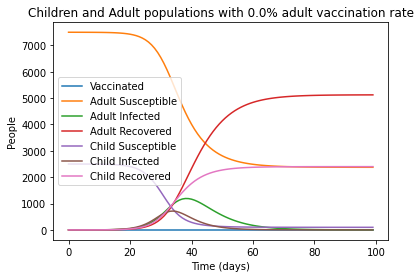

2401.0090939767806 children or 96.04036375907123% of children have been infected.


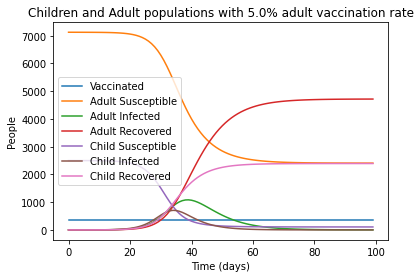

2392.955342704212 children or 95.71821370816848% of children have been infected.


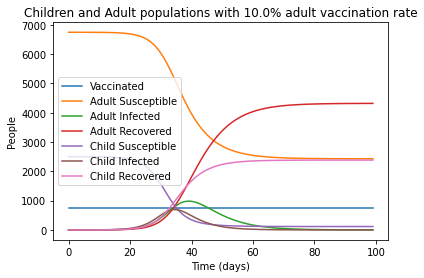

2384.4592944100004 children or 95.37837177640002% of children have been infected.


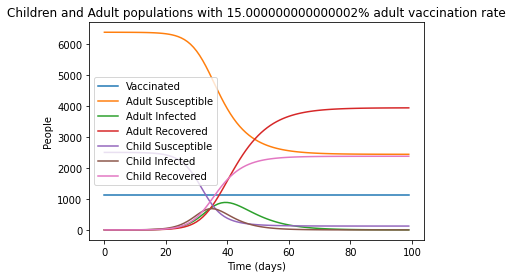

2375.5488337666798 children or 95.02195335066719% of children have been infected.


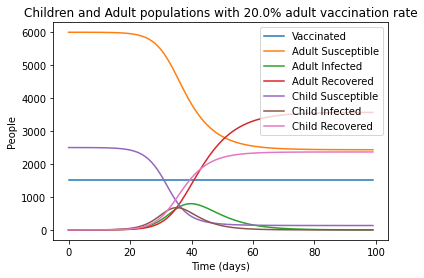

2366.2642805028604 children or 94.65057122011441% of children have been infected.


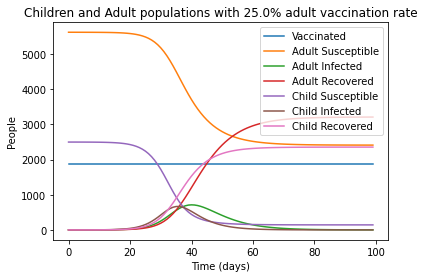

2356.6583300893044 children or 94.26633320357217% of children have been infected.


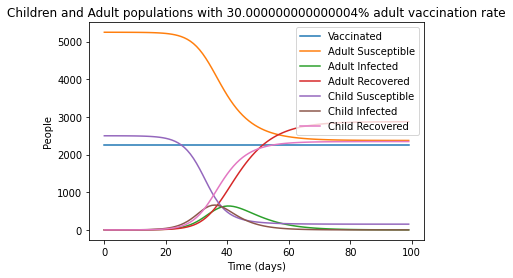

2346.794969384149 children or 93.87179877536596% of children have been infected.


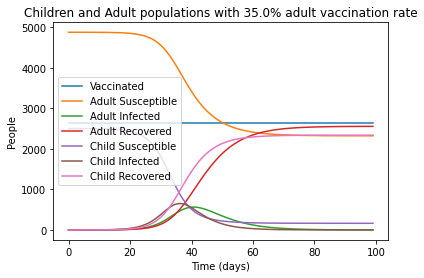

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def main(N, I, p, R_c, R_s, household_size, fraction_of_adults_vaccinated, D, run_time):
  fraction = fraction_of_adults_vaccinated

  N_children = round(N*.25)
  N_adults = round(N*.75)

  V = round(N*0.75*fraction)
  S_adult = round(N*0.75*(1-fraction))
  I_adult = I
  R_adult = 0

  S_children = round(N*0.25)
  I_children = 0
  R_children = 0


  V_list = []
  S_adult_list = []
  I_adult_list = []
  R_adult_list = []

  S_children_list = []
  I_children_list = []
  R_children_list = []

  T_list = range(run_time)

  for t in T_list:
    V_list.append(V)
    S_adult_list.append(S_adult)
    I_adult_list.append(I_adult)
    R_adult_list.append(R_adult)

    S_children_list.append(S_children)
    I_children_list.append(I_children)
    R_children_list.append(R_children)

    dS_adult = 0
    dI_adult = 0
    dR_adult = 0

    dS_children = 0
    dI_children = 0
    dR_children = 0

    # School transmission

    dS_children -= R_s/D*S_children/N_children*I_children
    dI_children += R_s/D*S_children/N_children*I_children

    # Community transmission

    dS_children -= R_c/D*(S_children)/N*(I_children + I_adult)
    dI_children += R_c/D*(S_children)/N*(I_children + I_adult)

    dS_adult -= R_c/D*(S_adult)/N*(I_children + I_adult)
    dI_adult += R_c/D*(S_adult)/N*(I_children + I_adult)

    # Household transmission (not simulated)

    # Recoveries
    dI_children -= I_children/D
    dI_adult -= I_adult/D

    dR_children += I_children/D
    dR_adult += I_adult/D

    S_adult += dS_adult
    I_adult += dI_adult
    R_adult += dR_adult

    S_children += dS_children
    I_children += dI_children
    R_children += dR_children


  plt.plot(T_list, V_list, label="Vaccinated")
  plt.plot(T_list, S_adult_list, label="Adult Susceptible")
  plt.plot(T_list, I_adult_list, label="Adult Infected")
  plt.plot(T_list, R_adult_list, label="Adult Recovered")
  plt.plot(T_list, S_children_list, label="Child Susceptible")
  plt.plot(T_list, I_children_list, label="Child Infected")
  plt.plot(T_list, R_children_list, label="Child Recovered")

  plt.xlabel("Time (days)")
  plt.ylabel("People")
  plt.title(f"Children and Adult populations with {fraction*100}% adult vaccination rate")

  plt.legend()
  plt.show()

  print(f"{R_children} children or {R_children/N_children*100}% of children have been infected.")


for i in np.arange(0.0,1.05,0.05):
  main(10000, 1, 0, 1.5, 2, 5, i, 5, 100)


  